# Table of Contents
- [**Setup**](#Setup)
- [**Introduction**](#Introduction)
- [**Problem Statement**](#Problem-Statement)
- [**Libraries**](#Libraries)
- [**Installing Libraries**](#Installing-Libraries)
- [**Updating Libraries**](#Updating-Libraries)
- [**Importing Libraries**](#Importing-Libraries)
- [**Data Acquisition & Description**](#Data-Acquisition-and-Description)
- [**Data Preprocessing**](#Data-Preprocessing)
- [**Exploratory Data Analysis**](#Exploratory-Data-Analysis)

# Setup
- Utilized Google Cloud Platform (GCP)'s Vertex AI Workbench for a managed R environment
- The dataset is hosted on Google Cloud Storage (GCS) which is then mounted into the notebook environment

In [41]:
version

               _                           
platform       x86_64-conda-linux-gnu      
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          3.2                         
year           2023                        
month          10                          
day            31                          
svn rev        85441                       
language       R                           
version.string R version 4.3.2 (2023-10-31)
nickname       Eye Holes                   

In [42]:
# Define the project ID and bucket name for the project
PROJECT_ID <- "instacart-basket-analysis-r"
BUCKET_NAME <- "instacart-market-basket-analysis"

In [43]:
# Define the GCS URL and data directory
gcs_url <- paste0("gs://", BUCKET_NAME, "/")
gcs_data_dir <- paste0("gs://", BUCKET_NAME, "/data/")

In [44]:
# Command to list all ZIP files in the GCS directory
# Just a quick check to determine if the files exist
command <- paste("gsutil ls", gcs_data_dir)
zip_files <- system(command, intern = TRUE)  # Capture the output
zip_files <- zip_files[grepl("\\.zip$", zip_files)]  # Filter ZIP files
print(zip_files)

[1] "gs://instacart-market-basket-analysis/data/aisles.csv.zip"               
[2] "gs://instacart-market-basket-analysis/data/departments.csv.zip"          
[3] "gs://instacart-market-basket-analysis/data/order_products__prior.csv.zip"
[4] "gs://instacart-market-basket-analysis/data/order_products__train.csv.zip"
[5] "gs://instacart-market-basket-analysis/data/orders.csv.zip"               
[6] "gs://instacart-market-basket-analysis/data/products.csv.zip"             
[7] "gs://instacart-market-basket-analysis/data/sample_submission.csv.zip"    


# Introduction

---

- **Instacart** is an American company that operates as a same-day grocery delivery and pick-up service in the United States and Canada.
- It was founded in 2012 by Apoorva Mehta, Max Mullen, and Brandon Leonardo.
- Instacart partners with more than **750 national, regional, and local retailers**, offering delivery from over 65,000 stores
- The company serves millions of households, aiming to make online grocery shopping **convenient and accessible** for customers while providing actionable data insights to retailers.
- In the **competitive e-commerce** and **grocery delivery market**, understanding customer behavior and improving the shopping experience is crucial.

<center><img width=50% src="https://shorturl.at/YRoYn"></center>

- This dataset from Instacart illustrates the potential of using real-world data for **Exploratory Data Analysis (EDA)** to enhance user experience and operational efficiency.

# Problem Statement

---
- Currently the data science team at Instacart uses transactional data to develop models to predict what products a user will buy again, try for the first time OR add to their cart next during a session. In the given problem, 4 to 100 orders of a customer are given (we will look at this later) and we need to predict the products that will be re-ordered. So the last order of the user has been taken out and divided into train and test sets. All the prior order informations of the customer are present in **order_products**. There is also a column in orders.csv file called eval_set which tells us as to which of the three datasets (prior, train or test) the given row goes to.

Some major outcomes of the analysis include:
- **Understanding Product Popularity**: What are the most frequently purchased and reordered items across all customers?
- **Analyzing Customer Purchase Behavior**: How often do customers place orders, and what is the typical basket size and reorder ratio?
- **Temporal Purchase Patterns**: How do time-related factors, such as the day of the week or time of day, affect customer purchasing decisions?
- **Uncovering Product Associations**: What relationships exist between co-purchased products, and how can they inform recommendations?
- **Order Progression Analysis**: How do customer purchasing habits evolve across successive orders?

# Libraries

---
- In this notebook, I will be installing and importing all of the major libraries into the notebook environment

## Installing Libraries

In [5]:
# List the necessary packages
needed_packages <- c("dplyr", "ggplot2", "bigrquery")

# Check if packages are installed
installed_packages <- .packages(all.available = TRUE)
missing_packages <- needed_packages[!(needed_packages %in% installed_packages)]

# If any are missing, install them
if (length(missing_packages) > 0) {
  install.packages(missing_packages)
}

In [6]:
# Install and load necessary packages (do this once in your notebook)
if(!require(sysfonts)) install.packages("sysfonts")
library(ggplot2)
library(sysfonts)

Loading required package: sysfonts



In [7]:
# Add Google Fonts (do this once in your notebook)
font_add_google("Montserrat", "montserrat")
font_add_google("Nunito Sans", "nunitosans")
font_add_google("Open Sans", "opensans")

## Updating Libraries
- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [8]:
tidyverse_update() # run the update

ERROR: Error in tidyverse_update(): could not find function "tidyverse_update"


In [9]:
# Verify the versions of the updated packages here 
packageVersion("broom")
packageVersion("jsonlite")
packageVersion("lubridate")
packageVersion("pillar")
packageVersion("ragg")
packageVersion("reprex")

[1] ‘1.0.7’

[1] ‘1.8.9’

[1] ‘1.9.4’

[1] ‘1.10.1’

[1] ‘1.2.6’

[1] ‘2.1.1’

Seems like the Kaggle **R** environment doesn't have support for the most updated versions of the above listed packages

## Importing Libraries

A description of all packages within the *Tidyverse* universe
- **dplyr**
  - Provides a grammar of data manipulation for clean, concise, and efficient data wrangling
  - Filtering, grouping, summarizing, and transforming data with a pipe-friendly syntax
- **forcats**
  - Simplifies working with factors
  - Reordering levels, lumping categories and renaming factors easily
- **ggplot2**
  - Filtering, grouping, summarizing, and transforming data with a pipe-friendly syntax
- **lubridate**
  - Makes working with date and time data simple and intuitive
  - Parsing, extracting, and manipulating date-time components, handling time zones effectively
- **purrr**
  - Enhances functional programming in R by providing tools for list manipulation and iteration
  - Mapping functions, safely handling errors, and simplifying complex data transformations
- **readr**
  - Offers efficient tools for reading rectangular data files like CSV, TSV, and fixed-width files
  - Fast parsing, customizable column types, and consistent handling of missing values
- **stringr**
  - Provides a coherent set of tools for working with strings
  - Pattern matching, string manipulation, and concise regex syntax
- **tibble**
  - Modern alternative to data frames, with cleaner printing and support for non-standard variable names
  - Consistent subsetting behavior, custom column types, and improved display for large datasets
- **tidyr**
  - Simplifies data tidying by converting datasets into a "tidy" format (one variable per column, one observation per row)
  - Reshaping data (e.g., pivoting, unnesting), handling missing data, and extracting/combining columns

The libraries have already been installed in the previous sessions

In [10]:
library(tidyverse) # consists of the entire list of packages necessary to perform data analysis, visualization and reading strings in R

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [11]:
library(RColorBrewer)

# Data Acquisition

---
- This section is emphasised on acquiring the data and obtaining some descriptive information out of it.
- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).
- You will be working with a direct source of link to head start your work without worrying about anything.
- Before going further you must have a good idea about the features of the data set

    - **aisles.csv**: Aisle ID and a little description of the products in that aisle
    - **departments.csv**: the department ID and a particular department name
    - **order_products__*.csv**: order_products__prior.csv contains previous order contents for all customers. 'reordered' indicates that the customer has a previous order that contains the product. Note that some orders will have no reordered items. You may predict an explicit 'None' value for orders with no reordered items. See the evaluation page for full details.
        `
            order_id,product_id,add_to_cart_order,reordered
            1,49302,1,1
            1,11109,2,1
            1,10246,3,0
            ...
        `
    - **orders.csv**: This file tells to which set (prior, train, test) an order belongs. You are predicting reordered items only for the test set orders. 'order_dow' is the day of week.
order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2539329,1,prior,1,2,08,
2398795,1,prior,2,3,07,15.0
473747,1,prior,3,3,12,21.0
…

    - **products.csv**: product_id,product_name,aisle_id,department_id
    1,Chocolate Sandwich Cookies,61,19  
    2,All-Seasons Salt,104,13  
    3,Robust Golden Unsweetened Oolong Tea,94,7  
    ...

    - **sample_submission.csv**:

In [45]:
# Define the input data directory
data_dir <- "instacart-market-basket-analysis/data_out/"

# Read the datasets
order_products_train_df <- read.csv(file.path(data_dir, "order_products__train.csv"))
order_products_prior_df <- read.csv(file.path(data_dir, "order_products__prior.csv"))
orders_df <- read.csv(file.path(data_dir, "orders.csv"))
products_df <- read.csv(file.path(data_dir, "products.csv"))
aisles_df <- read.csv(file.path(data_dir, "aisles.csv"))
departments_df <- read.csv(file.path(data_dir, "departments.csv"))

In [47]:
# Convert them to tibble for dplyr-friendly manipulation
order_products_train_df <- as_tibble(order_products_train_df)
order_products_prior_df <- as_tibble(order_products_prior_df)
orders_df <- as_tibble(orders_df)
products_df <- as_tibble(products_df)
aisles_df <- as_tibble(aisles_df)
departments_df <- as_tibble(departments_df)

## Dataset information

The dataset is used to analyze historical purchasing behavior and reordering patterns. It helps in predicting which products customers are likely to reorder in the future.

**orders_df**

In [49]:
# Display the first few rows of orders dataframe
head(orders_df, 10)

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>
2539329,1,prior,1,2,8,NA
2398795,1,prior,2,3,7,15
473747,1,prior,3,3,12,21
2254736,1,prior,4,4,7,29
431534,1,prior,5,4,15,28
3367565,1,prior,6,2,7,19
550135,1,prior,7,1,9,20
3108588,1,prior,8,1,14,14
2295261,1,prior,9,1,16,0


- The `orders_df` is a comprehensive dataset which combines data from all of the 3 evaluation sets into one table. For instance, let's check for a particular user

In [50]:
# Display unique values in a particular column
orders_df %>% 
filter(user_id==1)
unique_vals = unique(orders_df$eval_set)
unique_vals

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>
2539329,1,prior,1,2,8,NA
2398795,1,prior,2,3,7,15
473747,1,prior,3,3,12,21
2254736,1,prior,4,4,7,29
431534,1,prior,5,4,15,28
3367565,1,prior,6,2,7,19
550135,1,prior,7,1,9,20
3108588,1,prior,8,1,14,14
2295261,1,prior,9,1,16,0


[1] "prior" "train" "test"

**Observations**

- `order_id` refers to an order altogether
- `user_id` refers to the user creating the order
- `eval_set` is a distribution set which segregates the orders into `prior`, `train` and `test` sets
- `order_number` refers to the sequence in which the orders were made
- `order_dow` is the particular day on which the order took place
- `order_hour_of_day` is the time at which the products were ordered during a particular day
- `days_since_prior_order` is the no of days elapsed since the last order 

**order_products_prior_df**

In [51]:
# Display the first 10 rows of the dataframe
head(order_products_prior_df, 10)

order_id,product_id,add_to_cart_order,reordered
<int>,<int>,<int>,<int>
2,33120,1,1
2,28985,2,1
2,9327,3,0
2,45918,4,1
2,30035,5,0
2,17794,6,1
2,40141,7,1
2,1819,8,1
2,43668,9,0


**Observations**
- `order_id` refers to the particular order identification 
- `product_id` refers to the particular product identification 
- `add_to_cart_order` is the sequence in which a particular product is added to a cart order 
- `order_number` refers to the order number in sequence for a particular customer. According to the dataset, any particular user has made between 4 and 100 orders for a particular order 
- `order_dow` is the day on which the order is made
- `order_hour_of_day` is the day on which the order is made
- `days_since_prior_order` refers to the days since which the last order was made 

**order_products_train_df**

In [52]:
# Display the first 10 rows of the dataframe 
head(order_products_train_df, 10)

order_id,product_id,add_to_cart_order,reordered
<int>,<int>,<int>,<int>
1,49302,1,1
1,11109,2,1
1,10246,3,0
1,49683,4,0
1,43633,5,1
1,13176,6,0
1,47209,7,0
1,22035,8,1
36,39612,1,0


**Observations**
- `order_id` refers to the identification for a particular order in a dataframe 
- `product_id` refers to the identification for a particular product in a dataframe

**products_df**

In [19]:
head(products_df, 10)

product_id,product_name,aisle_id,department_id
<int>,<chr>,<int>,<int>
1,Chocolate Sandwich Cookies,61,19
2,All-Seasons Salt,104,13
3,Robust Golden Unsweetened Oolong Tea,94,7
4,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,38,1
5,Green Chile Anytime Sauce,5,13
6,Dry Nose Oil,11,11
7,Pure Coconut Water With Orange,98,7
8,Cut Russet Potatoes Steam N' Mash,116,1
9,Light Strawberry Blueberry Yogurt,120,16


**Observations**
- `product_id` refers to the product identification
- `product_name` refers to the product name
- `aisle_id` refers to the aisle ID
- `department_id` refers to the department to which the particular product belongs

**aisles_df** 

In [53]:
head(aisles_df, 10)

aisle_id,aisle
<int>,<chr>
1,prepared soups salads
2,specialty cheeses
3,energy granola bars
4,instant foods
5,marinades meat preparation
6,other
7,packaged meat
8,bakery desserts
9,pasta sauce


**Observations**
- `aisle_id` is the unique aisle identification
- `aisle_name` is the aisle from which a particular product is drawn

**departments_df**

In [54]:
head(departments_df, 10)

department_id,department
<int>,<chr>
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


**Observations**
- `department_id` refers to the unique identification for a particular department
- `department_name` refers to the unique department name corresponding to the particular department

## Observations and analysis
- ---
Below is a brief description of each variable in the dataset:
- `order_id`: Unique identifier for each order.  
- `user_id`: Unique identifier for each customer.  
- `eval_set`: Indicates the dataset type (e.g., "prior", "train", "test").  
- `order_number`: Sequential number of a user's order.  
- `order_dow`: Day of the week when the order was placed (0 = Sunday).  
- `order_hour_of_day`: Hour of the day when the order was placed.  
- `days_since_prior_order`: Number of days since the customer's last order.  


## Data Description

Here we will be calculating some brief statistics for each of the datasets

In [56]:
# Function for initial data inspection
prelim_inspection <- function(df) {
  print(head(df))  # Preview first few rows
  print(dim(df))  # Print number of rows and columns
  print(str(df))  # Show data structure
  print(any(is.na(df)))  # Check if any NA values exist
  print(summary(df))  # Summary statistics
  return(invisible(NULL))
}

# Function to check missing values
null_values <- function(df) {
  missing_vals <- colSums(is.na(df))
  missing_perc <- (missing_vals / nrow(df)) * 100
  missing_df <- data.frame(Variable = names(missing_vals), MissingCount = missing_vals, MissingPercent = missing_perc)
  missing_df <- missing_df[order(-missing_df$MissingCount), ]  # Sort in descending order
  print(missing_df)
  return(missing_df)
}

# Function to count unique values per column
unique_value_count <- function(df) {
  unique_counts <- sapply(df, function(col) length(unique(col)))
  unique_df <- data.frame(Column = names(unique_counts), UniqueValues = unique_counts)
  print(unique_df)
  return(unique_df)
}

### orders_df

In [57]:
prelim_inspection(orders_df)

# A tibble: 6 × 7
  order_id user_id eval_set order_number order_dow order_hour_of_day
     <int>   <int> <chr>           <int>     <int>             <int>
1  2539329       1 prior               1         2                 8
2  2398795       1 prior               2         3                 7
3   473747       1 prior               3         3                12
4  2254736       1 prior               4         4                 7
5   431534       1 prior               5         4                15
6  3367565       1 prior               6         2                 7
# ℹ 1 more variable: days_since_prior_order <dbl>
[1] 3421083       7
tibble [3,421,083 × 7] (S3: tbl_df/tbl/data.frame)
 $ order_id              : int [1:3421083] 2539329 2398795 473747 2254736 431534 3367565 550135 3108588 2295261 2550362 ...
 $ user_id               : int [1:3421083] 1 1 1 1 1 1 1 1 1 1 ...
 $ eval_set              : chr [1:3421083] "prior" "prior" "prior" "prior" ...
 $ order_number          : int [1:34210

In [58]:
null_values(orders_df)

                                     Variable MissingCount MissingPercent
days_since_prior_order days_since_prior_order       206209       6.027594
order_id                             order_id            0       0.000000
user_id                               user_id            0       0.000000
eval_set                             eval_set            0       0.000000
order_number                     order_number            0       0.000000
order_dow                           order_dow            0       0.000000
order_hour_of_day           order_hour_of_day            0       0.000000


,Variable,MissingCount,MissingPercent
,<chr>,<dbl>,<dbl>
days_since_prior_order,days_since_prior_order,206209,6.027594
order_id,order_id,0,0.000000
user_id,user_id,0,0.000000
eval_set,eval_set,0,0.000000
order_number,order_number,0,0.000000
order_dow,order_dow,0,0.000000
order_hour_of_day,order_hour_of_day,0,0.000000


**Observation(s)**
- 6% of the values in `days_since_prior_order` are missing. The potential reasons for this could be:
    - **MAR (Irregular Shopping Patterns)**: Missing values depend on user behavior; use mode-based imputation by user behaviour or perform predictive modeling for possible imputation.
    - **MNAR (First-Time Orders)**: Missing due to no prior orders; apply categorical imputation (0 or "First Order").
    - **MCAR (Data Entry Issues)**: Random system errors; use forward imputation, random sampling, or deletion if minimal.

**For the time being, I am assuming that the values are missing due to no prior orders, and imputing them as 0**

In [59]:
## Days since prior order null values
# Create a data frame to display null counts in a tabular format
na_summary <- data.frame(
  Column = names(orders_df),
  Missing_Values = colSums(is.na(orders_df))
)

# Print neatly
print(na_summary, row.names = FALSE)

                 Column Missing_Values
               order_id              0
                user_id              0
               eval_set              0
           order_number              0
              order_dow              0
      order_hour_of_day              0
 days_since_prior_order         206209


In [60]:
# Fixing missing values in days_since_prior_order
# Display unique values including NA
unique(orders_df$days_since_prior_order)

[1] NA 15 21 29 28 19 20 14  0 30 10  3  8 13 27  6  9 12  7 17 11 22  4  5  2
[26] 23 26 25 16  1 18 24

In [229]:
# Count of unique values (excluding NA)
num_unique_values <- length(unique(na.omit(orders_df$days_since_prior_order)))
print(paste("Total Unique Values (excluding NA):", num_unique_values))

[1] "Total Unique Values (excluding NA): 31"


In [230]:
# Create a frequency table for unique values (including NA)
unique_value_counts <- as.data.frame(table(orders_df$days_since_prior_order, useNA = "ifany"))

In [231]:
# Fill all NA values with 0 for the time being, indicating the absence of a value
# Verify if all NA values have been replaced
# Replace NA values with 0 in the 'days_since_prior_order' column
orders_df$days_since_prior_order[is.na(orders_df$days_since_prior_order)] <- 0

# Verify if all NA values have been replaced
sum(is.na(orders_df$days_since_prior_order))  # Should return 0

[1] 0

**Observations and Analysis**
- Thus, all null values have been imputed with zero

In [61]:
unique_value_count(orders_df)

                                       Column UniqueValues
order_id                             order_id      3421083
user_id                               user_id       206209
eval_set                             eval_set            3
order_number                     order_number          100
order_dow                           order_dow            7
order_hour_of_day           order_hour_of_day           24
days_since_prior_order days_since_prior_order           32


,Column,UniqueValues
,<chr>,<int>
order_id,order_id,3421083
user_id,user_id,206209
eval_set,eval_set,3
order_number,order_number,100
order_dow,order_dow,7
order_hour_of_day,order_hour_of_day,24
days_since_prior_order,days_since_prior_order,32


**Observations and Analysis**
- A point to be observed is that all the recorded customers did order within a month gap and did not take more time than that 

### order_products_prior_df

In [235]:
prelim_inspection(order_products_prior_df)

# A tibble: 6 × 4
  order_id product_id add_to_cart_order reordered
     <int>      <int>             <int>     <int>
1        2      33120                 1         1
2        2      28985                 2         1
3        2       9327                 3         0
4        2      45918                 4         1
5        2      30035                 5         0
6        2      17794                 6         1
[1] 32434489        4
tibble [32,434,489 × 4] (S3: tbl_df/tbl/data.frame)
 $ order_id         : int [1:32434489] 2 2 2 2 2 2 2 2 2 3 ...
 $ product_id       : int [1:32434489] 33120 28985 9327 45918 30035 17794 40141 1819 43668 33754 ...
 $ add_to_cart_order: int [1:32434489] 1 2 3 4 5 6 7 8 9 1 ...
 $ reordered        : int [1:32434489] 1 1 0 1 0 1 1 1 0 1 ...
NULL
[1] FALSE
    order_id         product_id    add_to_cart_order   reordered     
 Min.   :      2   Min.   :    1   Min.   :  1.000   Min.   :0.0000  
 1st Qu.: 855943   1st Qu.:13530   1st Qu.:  3.000   1st Qu.:0.

In [236]:
null_values(order_products_prior_df)

                           Variable MissingCount MissingPercent
order_id                   order_id            0              0
product_id               product_id            0              0
add_to_cart_order add_to_cart_order            0              0
reordered                 reordered            0              0


,Variable,MissingCount,MissingPercent
,<chr>,<dbl>,<dbl>
order_id,order_id,0,0
product_id,product_id,0,0
add_to_cart_order,add_to_cart_order,0,0
reordered,reordered,0,0


In [237]:
unique_value_count(order_products_prior_df)

                             Column UniqueValues
order_id                   order_id      3214874
product_id               product_id        49677
add_to_cart_order add_to_cart_order          145
reordered                 reordered            2


,Column,UniqueValues
,<chr>,<int>
order_id,order_id,3214874
product_id,product_id,49677
add_to_cart_order,add_to_cart_order,145
reordered,reordered,2


**Observations**
- Customers ordered a maximum of 145 items in any given order 
- Products can either be reordered or not

### order_products_train_df

In [239]:
prelim_inspection(order_products_train_df)

# A tibble: 6 × 4
  order_id product_id add_to_cart_order reordered
     <int>      <int>             <int>     <int>
1        1      49302                 1         1
2        1      11109                 2         1
3        1      10246                 3         0
4        1      49683                 4         0
5        1      43633                 5         1
6        1      13176                 6         0
[1] 1384617       4
tibble [1,384,617 × 4] (S3: tbl_df/tbl/data.frame)
 $ order_id         : int [1:1384617] 1 1 1 1 1 1 1 1 36 36 ...
 $ product_id       : int [1:1384617] 49302 11109 10246 49683 43633 13176 47209 22035 39612 19660 ...
 $ add_to_cart_order: int [1:1384617] 1 2 3 4 5 6 7 8 1 2 ...
 $ reordered        : int [1:1384617] 1 1 0 0 1 0 0 1 0 1 ...
NULL
[1] FALSE
    order_id         product_id    add_to_cart_order   reordered     
 Min.   :      1   Min.   :    1   Min.   : 1.000    Min.   :0.0000  
 1st Qu.: 843370   1st Qu.:13380   1st Qu.: 3.000    1st Qu.:0.000

In [240]:
null_values(order_products_train_df)

                           Variable MissingCount MissingPercent
order_id                   order_id            0              0
product_id               product_id            0              0
add_to_cart_order add_to_cart_order            0              0
reordered                 reordered            0              0


,Variable,MissingCount,MissingPercent
,<chr>,<dbl>,<dbl>
order_id,order_id,0,0
product_id,product_id,0,0
add_to_cart_order,add_to_cart_order,0,0
reordered,reordered,0,0


In [242]:
unique_value_count(order_products_train_df)

                             Column UniqueValues
order_id                   order_id       131209
product_id               product_id        39123
add_to_cart_order add_to_cart_order           80
reordered                 reordered            2


,Column,UniqueValues
,<chr>,<int>
order_id,order_id,131209
product_id,product_id,39123
add_to_cart_order,add_to_cart_order,80
reordered,reordered,2


### products_df

In [243]:
prelim_inspection(products_df)

# A tibble: 6 × 4
  product_id product_name                                 aisle_id department_id
       <int> <chr>                                           <int>         <int>
1          1 Chocolate Sandwich Cookies                         61            19
2          2 All-Seasons Salt                                  104            13
3          3 Robust Golden Unsweetened Oolong Tea               94             7
4          4 Smart Ones Classic Favorites Mini Rigatoni …       38             1
5          5 Green Chile Anytime Sauce                           5            13
6          6 Dry Nose Oil                                       11            11
[1] 49688     4
tibble [49,688 × 4] (S3: tbl_df/tbl/data.frame)
 $ product_id   : int [1:49688] 1 2 3 4 5 6 7 8 9 10 ...
 $ product_name : chr [1:49688] "Chocolate Sandwich Cookies" "All-Seasons Salt" "Robust Golden Unsweetened Oolong Tea" "Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce" ...
 $ aisle_id     : int 

In [244]:
null_values(products_df)

                   Variable MissingCount MissingPercent
product_id       product_id            0              0
product_name   product_name            0              0
aisle_id           aisle_id            0              0
department_id department_id            0              0


,Variable,MissingCount,MissingPercent
,<chr>,<dbl>,<dbl>
product_id,product_id,0,0
product_name,product_name,0,0
aisle_id,aisle_id,0,0
department_id,department_id,0,0


In [245]:
unique_value_count(products_df)

                     Column UniqueValues
product_id       product_id        49688
product_name   product_name        49688
aisle_id           aisle_id          134
department_id department_id           21


,Column,UniqueValues
,<chr>,<int>
product_id,product_id,49688
product_name,product_name,49688
aisle_id,aisle_id,134
department_id,department_id,21


### aisles_df

In [246]:
prelim_inspection(aisles_df)

# A tibble: 6 × 2
  aisle_id aisle                     
     <int> <chr>                     
1        1 prepared soups salads     
2        2 specialty cheeses         
3        3 energy granola bars       
4        4 instant foods             
5        5 marinades meat preparation
6        6 other                     
[1] 134   2
tibble [134 × 2] (S3: tbl_df/tbl/data.frame)
 $ aisle_id: int [1:134] 1 2 3 4 5 6 7 8 9 10 ...
 $ aisle   : chr [1:134] "prepared soups salads" "specialty cheeses" "energy granola bars" "instant foods" ...
NULL
[1] FALSE
    aisle_id         aisle          
 Min.   :  1.00   Length:134        
 1st Qu.: 34.25   Class :character  
 Median : 67.50   Mode  :character  
 Mean   : 67.50                     
 3rd Qu.:100.75                     
 Max.   :134.00                     


In [247]:
null_values(aisles_df)

         Variable MissingCount MissingPercent
aisle_id aisle_id            0              0
aisle       aisle            0              0


,Variable,MissingCount,MissingPercent
,<chr>,<dbl>,<dbl>
aisle_id,aisle_id,0,0
aisle,aisle,0,0


In [248]:
unique_value_count(aisles_df)

           Column UniqueValues
aisle_id aisle_id          134
aisle       aisle          134


,Column,UniqueValues
,<chr>,<int>
aisle_id,aisle_id,134
aisle,aisle,134


**Observations and Analysis**
- Does this actually refer to physical aisles? Its not possible even for a large-scale departmental store
    - The data shows a high number of unique aisle IDs in the Instacart dataset, indicating a granular product categorization system rather than physical store aisles. It suggests detailed organization for inventory and potentially targeted marketing based on customer shopping habits within these product categories. Understand the grouping of such data

### departments_df

In [249]:
prelim_inspection(departments_df)

# A tibble: 6 × 2
  department_id department   
          <int> <chr>        
1             1 frozen       
2             2 other        
3             3 bakery       
4             4 produce      
5             5 alcohol      
6             6 international
[1] 21  2
tibble [21 × 2] (S3: tbl_df/tbl/data.frame)
 $ department_id: int [1:21] 1 2 3 4 5 6 7 8 9 10 ...
 $ department   : chr [1:21] "frozen" "other" "bakery" "produce" ...
NULL
[1] FALSE
 department_id  department       
 Min.   : 1    Length:21         
 1st Qu.: 6    Class :character  
 Median :11    Mode  :character  
 Mean   :11                      
 3rd Qu.:16                      
 Max.   :21                      


In [250]:
null_values(departments_df)

                   Variable MissingCount MissingPercent
department_id department_id            0              0
department       department            0              0


,Variable,MissingCount,MissingPercent
,<chr>,<dbl>,<dbl>
department_id,department_id,0,0
department,department,0,0


In [252]:
unique_value_count(departments_df)

                     Column UniqueValues
department_id department_id           21
department       department           21


,Column,UniqueValues
,<chr>,<int>
department_id,department_id,21
department,department,21


# Data Preprocessing
- In this step, I will be merging all the important data fields for comprehensive insights on a single flat compiled dataframe

In [253]:
order_prior_df <- order_products_prior_df %>% select(order_id, product_id, add_to_cart_order, reordered)
products_subset_df <- products_df  %>% select(product_id, aisle_id, department_id)
order_products_df <- inner_join(order_prior_df, products_subset_df, by="product_id")
head(order_products_df)

order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id
<int>,<int>,<int>,<int>,<int>,<int>
2,33120,1,1,86,16
2,28985,2,1,83,4
2,9327,3,0,104,13
2,45918,4,1,19,13
2,30035,5,0,17,13
2,17794,6,1,83,4


In [254]:
order_train_df <- order_products_train_df %>% select(order_id, product_id, add_to_cart_order, reordered)
order_products_df_1 <- inner_join(order_train_df, products_subset_df, by="product_id")
head(order_products_df_1)

order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id
<int>,<int>,<int>,<int>,<int>,<int>
1,49302,1,1,120,16
1,11109,2,1,108,16
1,10246,3,0,83,4
1,49683,4,0,83,4
1,43633,5,1,95,15
1,13176,6,0,24,4


In [35]:
orders_df_subset <- orders_df %>% select(order_id, user_id, eval_set, order_number, order_dow, order_hour_of_day, days_since_prior_order)
order_products_df <- inner_join(order_products_df, orders_df_subset, by="order_id")
head(order_products_df)

order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>
2,33120,1,1,86,16,202279,prior,3,5,9,8
2,28985,2,1,83,4,202279,prior,3,5,9,8
2,9327,3,0,104,13,202279,prior,3,5,9,8
2,45918,4,1,19,13,202279,prior,3,5,9,8
2,30035,5,0,17,13,202279,prior,3,5,9,8
2,17794,6,1,83,4,202279,prior,3,5,9,8


In [256]:
# Find the shape of the dataframe
dim(order_products_df)

[1] 32434489        6

In [37]:
order_products_df_1 <- inner_join(order_products_df_1, orders_df_subset, by="order_id")
head(order_products_df_1)

order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>
1,49302,1,1,120,16,112108,train,4,4,10,9
1,11109,2,1,108,16,112108,train,4,4,10,9
1,10246,3,0,83,4,112108,train,4,4,10,9
1,49683,4,0,83,4,112108,train,4,4,10,9
1,43633,5,1,95,15,112108,train,4,4,10,9
1,13176,6,0,24,4,112108,train,4,4,10,9


In [45]:
dim(order_products_df_1)

[1] 1384617      12

In [46]:
compiled_df <- rbind(order_products_df, order_products_df_1)
head(compiled_df)

order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>
2,33120,1,1,86,16,202279,prior,3,5,9,8
2,28985,2,1,83,4,202279,prior,3,5,9,8
2,9327,3,0,104,13,202279,prior,3,5,9,8
2,45918,4,1,19,13,202279,prior,3,5,9,8
2,30035,5,0,17,13,202279,prior,3,5,9,8
2,17794,6,1,83,4,202279,prior,3,5,9,8


**Dataset description**
- Check the sizes and description
- Check if col names are required
- Data sizes, null values AND just about everything

In [47]:
summary(compiled_df)

    order_id         product_id    add_to_cart_order   reordered     
 Min.   :      1   Min.   :    1   Min.   :  1.000   Min.   :0.0000  
 1st Qu.: 855413   1st Qu.:13519   1st Qu.:  3.000   1st Qu.:0.0000  
 Median :1710660   Median :25256   Median :  6.000   Median :1.0000  
 Mean   :1710566   Mean   :25576   Mean   :  8.368   Mean   :0.5901  
 3rd Qu.:2565587   3rd Qu.:37935   3rd Qu.: 11.000   3rd Qu.:1.0000  
 Max.   :3421083   Max.   :49688   Max.   :145.000   Max.   :1.0000  
    aisle_id      department_id       user_id         eval_set        
 Min.   :  1.00   Min.   : 1.000   Min.   :     1   Length:33819106   
 1st Qu.: 31.00   1st Qu.: 4.000   1st Qu.: 51435   Class :character  
 Median : 83.00   Median : 9.000   Median :102626   Mode  :character  
 Mean   : 71.22   Mean   : 9.919   Mean   :102944                     
 3rd Qu.:107.00   3rd Qu.:16.000   3rd Qu.:154412                     
 Max.   :134.00   Max.   :21.000   Max.   :206209                     
  order_numbe

In [48]:
head(compiled_df)

order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>
2,33120,1,1,86,16,202279,prior,3,5,9,8
2,28985,2,1,83,4,202279,prior,3,5,9,8
2,9327,3,0,104,13,202279,prior,3,5,9,8
2,45918,4,1,19,13,202279,prior,3,5,9,8
2,30035,5,0,17,13,202279,prior,3,5,9,8
2,17794,6,1,83,4,202279,prior,3,5,9,8


In [49]:
## Check for null values 
any(is.na(compiled_df))

[1] FALSE

In [51]:
## Count null values for each column
# Create a data frame to display null counts in a tabular format
na_summary <- data.frame(
  Column = names(compiled_df),
  Missing_Values = colSums(is.na(compiled_df))
)

# Print neatly
print(na_summary, row.names = FALSE)

                 Column Missing_Values
               order_id              0
             product_id              0
      add_to_cart_order              0
              reordered              0
               aisle_id              0
          department_id              0
                user_id              0
               eval_set              0
           order_number              0
              order_dow              0
      order_hour_of_day              0
 days_since_prior_order              0


In [52]:
# Check the data type of the dataframe
print(class(compiled_df))

[1] "tbl_df"     "tbl"        "data.frame"


In [56]:
# Write the output as CSV
write.csv(compiled_df, file = "instacart-market-basket-analysis/data_out/compiled_df.csv", row.names = FALSE)

In [ ]:
compiled_df <- read.csv('instacart-market-basket-analysis/data_out/compiled_df.csv')

**For the analysis moving forward, I will be working with a shorter version of the compiled dataframe which consists of 20% orders from the prior as well as the train sets. So let's create one**

In [257]:
# Set seed for reproducibility
set.seed(123)

# Function to sample 20% of unique order IDs from a specific eval_set
sample_orders <- function(data, eval_set_name, proportion = 0.2) {
  # Filter rows for the specific eval_set category
  subset_data <- data[data$eval_set == eval_set_name, ]
  
  # Get unique order IDs from the subset
  unique_order_ids <- unique(subset_data$order_id)
  
  # Calculate the number of order IDs to sample
  sample_size <- floor(length(unique_order_ids) * proportion)
  
  # Randomly sample 20% of unique order IDs
  sampled_order_ids <- sample(unique_order_ids, sample_size)
  
  # Filter the original dataframe for rows with sampled order IDs
  sampled_data <- data[data$order_id %in% sampled_order_ids, ]
  
  return(sampled_data)
}

In [ ]:
# Apply the function to all eval_set categories
train_sample <- sample_orders(compiled_df, "prior", 0.2)
valid_sample <- sample_orders(compiled_df, "train", 0.2)

In [260]:
nrow(compiled_df)

[1] 33819106

In [261]:
# Print all values together
cat("Number of rows in train sample:", num_rows_train, "\n")
cat("Number of rows in valid sample:", num_rows_valid, "\n")

Number of rows in train sample: 6491252 
Number of rows in valid sample: 278211 


In [62]:
# Combine the sampled subsets into one dataframe
shortened_df <- bind_rows(train_sample, valid_sample)
head(shortened_df, 10)

ERROR: Error: object 'train_sample' not found


In [ ]:
# Save shortened df
write.csv(shortened_df, "instacart-market-basket-analysis/data_out/shortened_df.csv", row.names=FALSE)

In [63]:
shortened_df = read.csv("instacart-market-basket-analysis/data_out/shortened_df.csv")

# Exploratory Data Analysis

In [22]:
# Set default height/width for plots generated
options(repr.plot.height = 9, repr.plot.width = 16)

## Customer Purchase Behaviour

### Count of all three evaluation sets

In [23]:
# Filter rows where eval_set is 'test'
test_data <- subset(orders_df, eval_set == "test")
head(test_data, 10)

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
<int>,<int>,<chr>,<int>,<int>,<int>,<dbl>
2774568,3,test,13,5,15,11
329954,4,test,6,3,12,30
1528013,6,test,4,3,16,22
1376945,11,test,8,6,11,8
1356845,12,test,6,1,20,30
2161313,15,test,23,1,9,7
1416320,16,test,7,0,13,7
1735923,19,test,10,6,17,8
1980631,20,test,5,1,11,30


**Observation**
- Each department has a particular ID and an associated department name

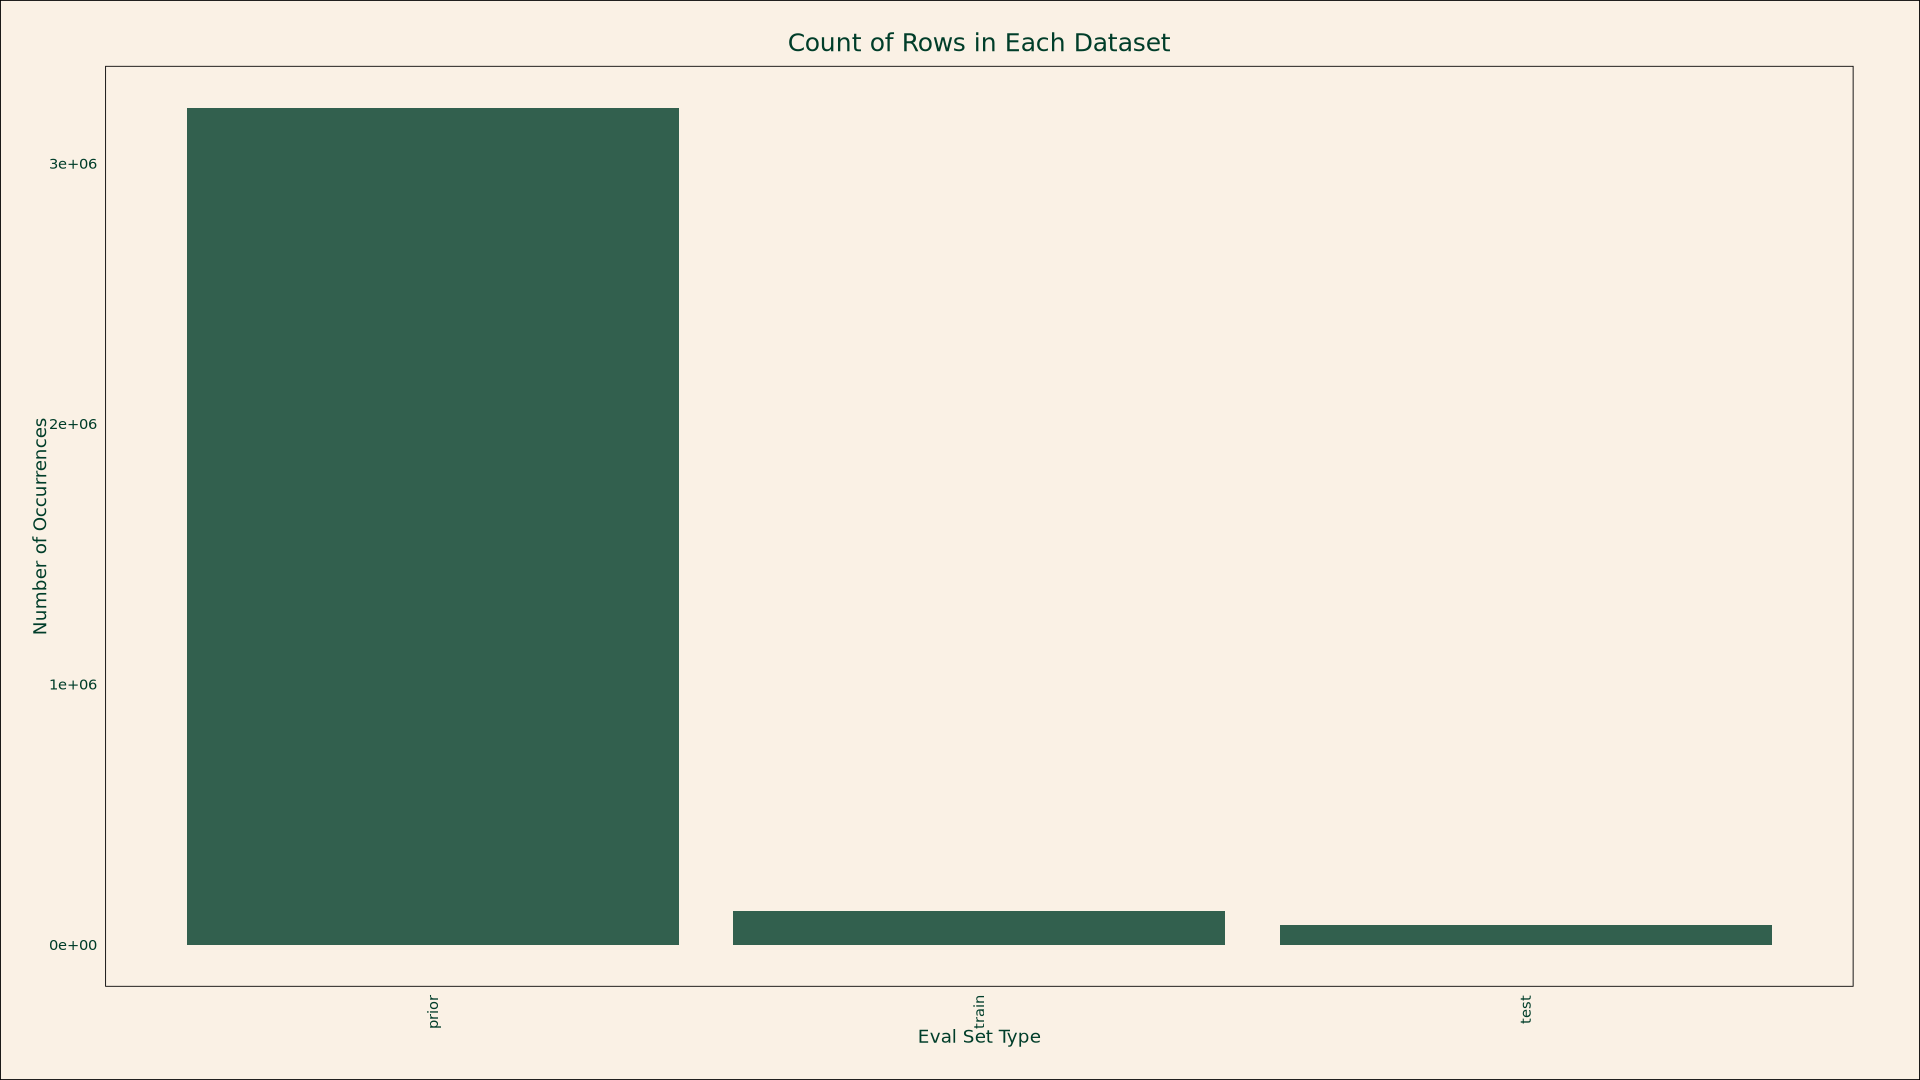

In [270]:
cnt_srs <- orders_df %>%
  group_by(eval_set) %>%
  summarise(count = n()) %>%
  mutate(eval_set = factor(eval_set, levels = eval_set[order(desc(count))]))

# Plot the bar chart
ggplot(cnt_srs, aes(x = eval_set, y = count)) +
  geom_bar(stat = "identity", alpha = 0.8, fill = "#003D29") +
  theme_minimal() +
  labs(
    title = "Count of Rows in Each Dataset",
    x = "Eval Set Type",
    y = "Number of Occurrences"
  ) +
  theme(
    axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1),
    plot.title = element_text(size = 15, hjust = 0.5, color = "#003D29"),
    plot.background = element_rect(fill = "#FAF1E5"),
    panel.background = element_rect(fill = "#FAF1E5"),
    axis.text = element_text(color = "#003D29", margin = margin(10, 0, 0, 0)),  # Increased margin for axis text
    axis.title = element_text(color = "#003D29", margin = margin(15, 0, 0, 0)), # Increased margin for axis labels
    panel.grid.major = element_blank(), # Remove major grid lines
    panel.grid.minor = element_blank(), # Remove minor grid lines
    plot.margin = margin(20, 40, 20, 20) # Adjust plot margins (t, r, b, l) to make wider
  )

In [125]:
getUniqueCount <- function(x) {
    length(unique(x))
}

cnt_srs <- orders_df %>%
           group_by(eval_set) %>%
           summarize(getUniqueCount(user_id))
cnt_srs

eval_set,getUniqueCount(user_id)
<chr>,<int>
prior,206209
test,75000
train,131209


- There are 206,209 customers in total, in which, the last purchase of 131,209 customers are given as train set and predictions are need to be made for the remaining 75000 customers. Now let's validate the claim that 4 to 100 orders for a customer are given

### Min AND Max orders for each customer
- As per the dataset, its claimed that between 4 to 100 orders for a customer are given. Let's verify this claim

In [24]:
# Step 1: Group by 'user_id' AND get the maximum 'order_number'
cnt_srs <- orders_df %>%
           group_by(user_id) %>%
           summarize(max_order_number = max(order_number, na.rm=TRUE)) %>%
           ungroup()

# Step 2: Count the occurrences of each maximum order number
cnt_srs <- cnt_srs %>%
  count(max_order_number)

# Result:
head(cnt_srs, 10)

max_order_number,n
<int>,<int>
4,23986
5,19590
6,16165
7,13850
8,11700
9,10190
10,9032
11,7815
12,6952


In [272]:
min(cnt_srs$max_order_number)

[1] 4

In [273]:
max(cnt_srs$max_order_number)

[1] 100

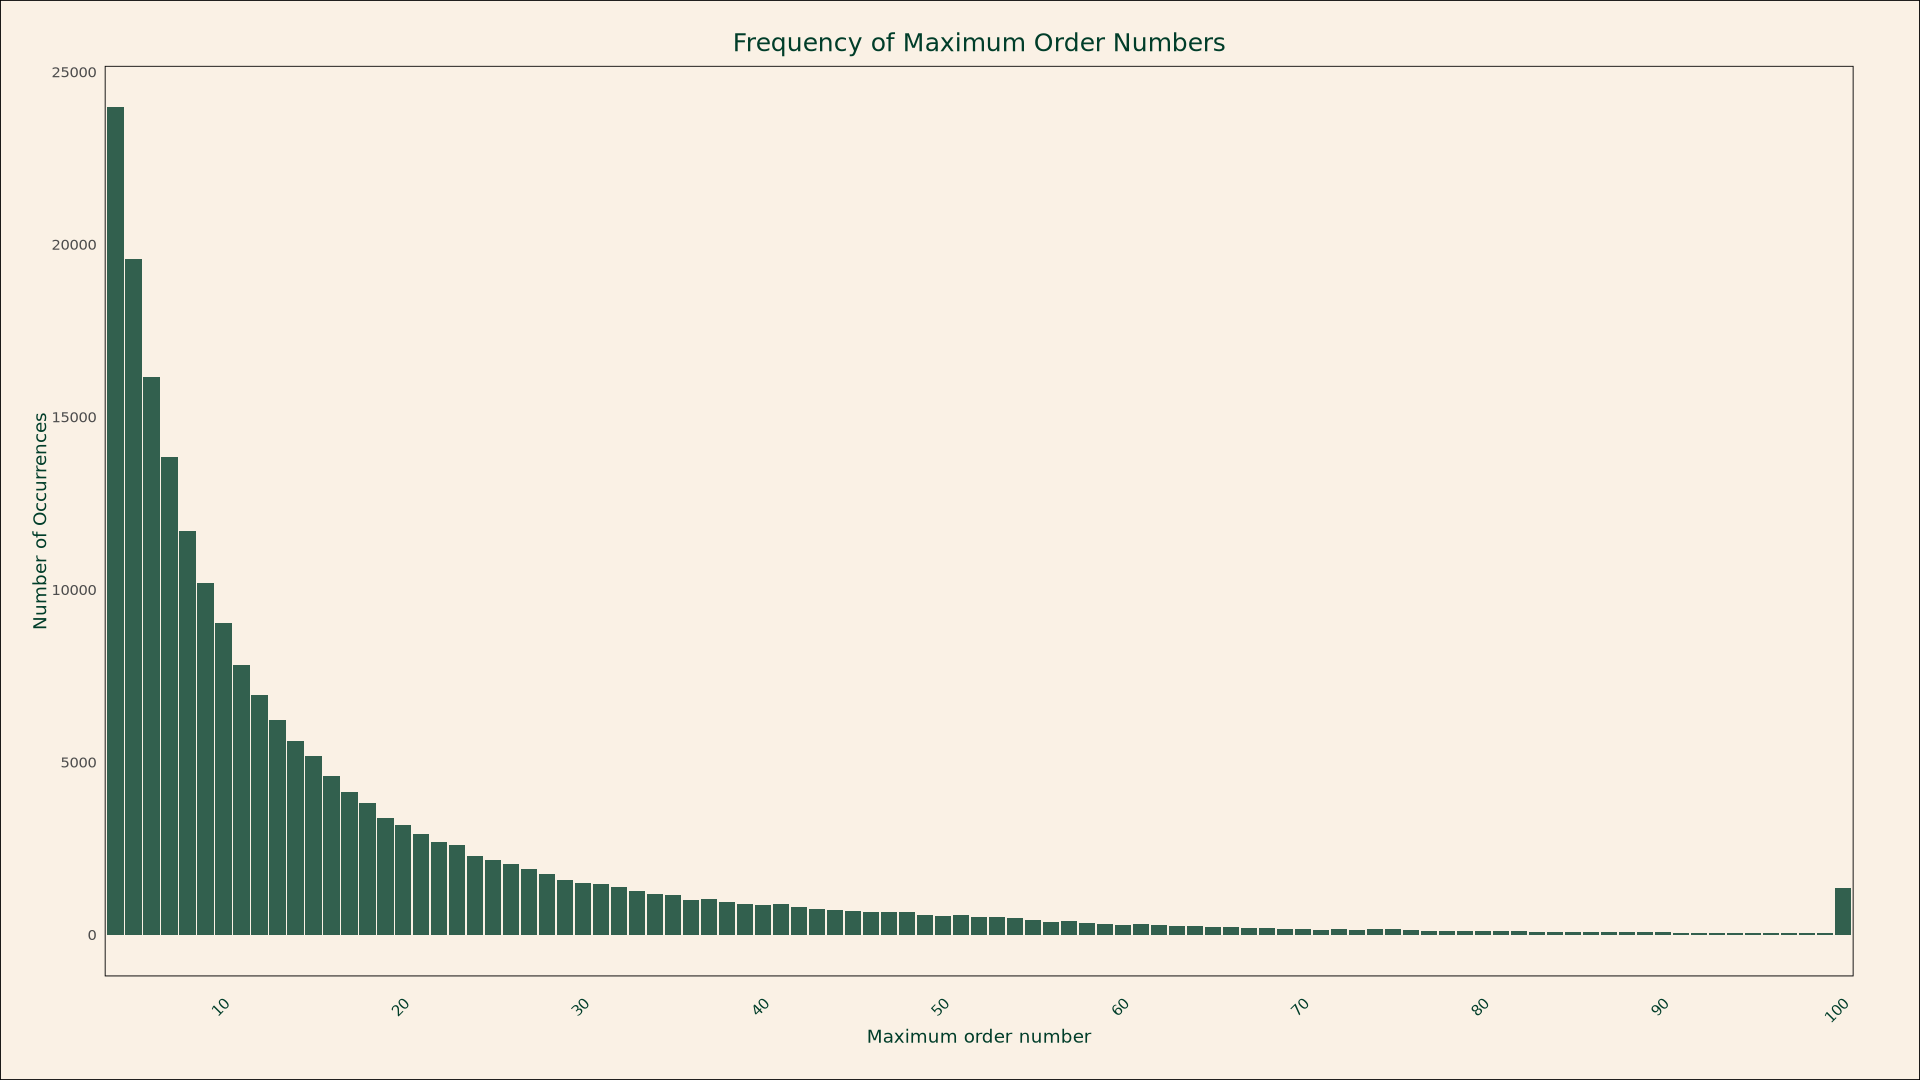

In [25]:
# Convert max_order_number to factor (important for controlling x-axis)
cnt_srs$max_order_number <- as.factor(cnt_srs$max_order_number)

# Now plot the data
ggplot(cnt_srs, aes(x = max_order_number, y = n)) +
  geom_bar(stat = "identity", fill = "#003D29", alpha = 0.8) +
  labs(
    x = "Maximum order number",
    y = "Number of Occurrences",
    title = "Frequency of Maximum Order Numbers"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 15, hjust = 0.5, color = "#003D29"),
    plot.background = element_rect(fill = "#FAF1E5"),
    panel.background = element_rect(fill = "#FAF1E5"),
    axis.text.x = element_text(
      angle = 45, hjust = 1, vjust = 1, 
      color = "#003D29", margin = margin(10, 0, 0, 0)
    ),
    axis.title = element_text(color = "#003D29", margin = margin(15, 0, 0, 0)),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    plot.margin = margin(20, 40, 20, 20)
  ) +
  scale_x_discrete(breaks = function(x) x[x %in% as.character(seq(10, max(as.numeric(as.character(x)), na.rm = TRUE), by = 10))])

**Observations**
- **Consumer Behavior Driven**: Regular needs (essentials) lead to high-frequency orders, while impulse or specialized purchases occur less often, influenced by quick-commerce’s small, frequent purchase model.

**Analysis**
- Marketers can track the earliest orders and show a customer "your usual purchases" upon their next order on the platform

### Purchase intervals

- Understanding purchase intervals is crucial for identifying customer shopping habits and frequency, which can directly influence personalization strategies and inventory management. By studying the time gaps between consecutive orders, we can segment customers into regular and irregular shoppers, predict their future purchase behaviors, and tailor recommendations accordingly. 
- For example, customers with consistent weekly intervals may respond well to timely reminders or recurring order suggestions, while irregular shoppers may require targeted promotions to encourage re-engagement. This analysis helps optimize marketing efforts and ensures a seamless shopping experience tailored to individual needs. 

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


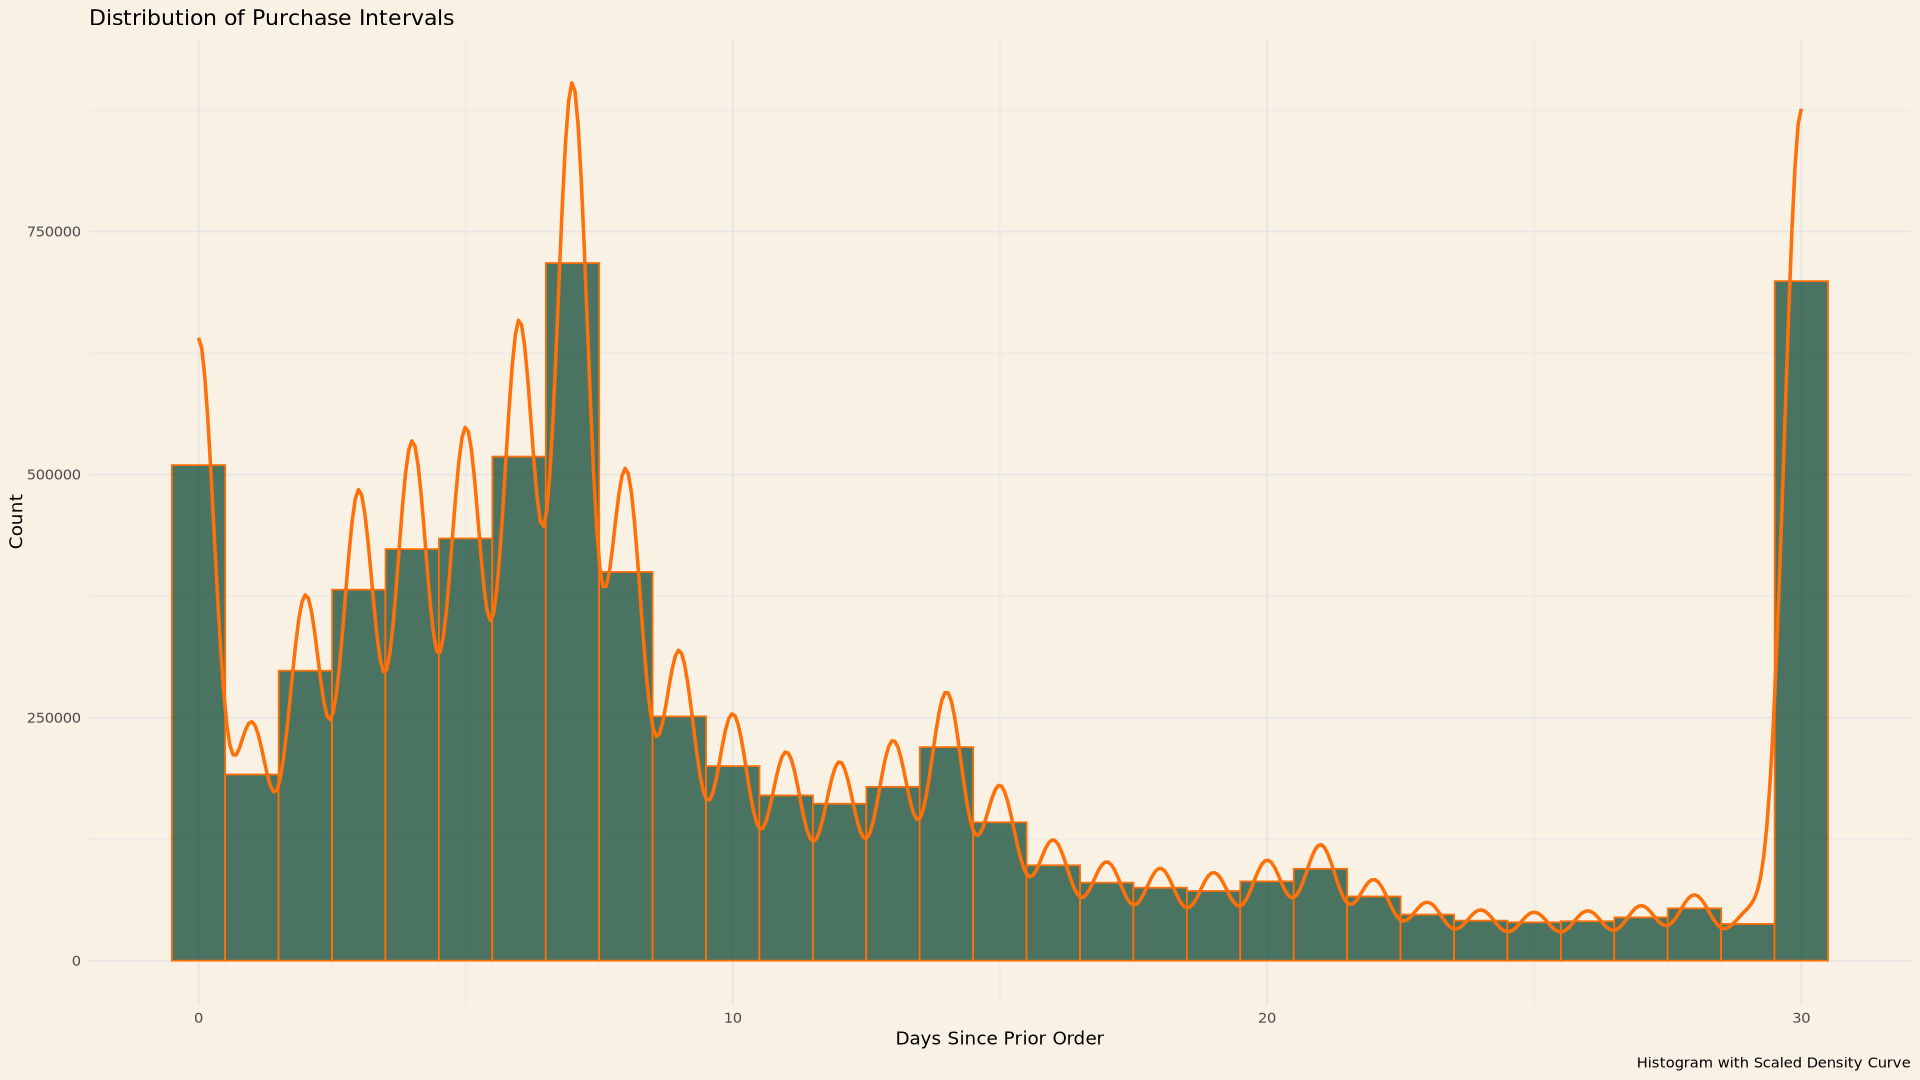

In [26]:
# Assuming your data is loaded in a data frame called `df`
# Filter relevant columns for analysis
df_filtered <- shortened_df %>%
  select(user_id, days_since_prior_order)

# 1. Distribution of Purchase Intervals (Histogram + Density Plot)
ggplot(df_filtered, aes(x = days_since_prior_order)) +
  geom_histogram(binwidth = 1, fill = "#003D29", color = "#FF7009", alpha = 0.7) +
  geom_density(aes(y = after_stat(density) * nrow(df_filtered) * 1), 
               color = "#FF7009", size = 1) +
  labs(
    title = "Distribution of Purchase Intervals",
    x = "Days Since Prior Order",
    y = "Count",
    caption = "Histogram with Scaled Density Curve"
  ) +
  theme_minimal() +
  theme(
    plot.background = element_rect(fill = "#FAF1E5", color = NA),
    panel.background = element_rect(fill = "#FAF1E5", color = NA),
    panel.grid = element_line(color = "grey90")
  )

**Observations**
- The analysis reveals distinct weekly (7-day) and monthly (30-day) shopping cycles, with most customers following habitual purchase patterns. A smaller group of irregular shoppers exhibits longer intervals (beyond 14 days), likely due to bulk buying or lower engagement. Understanding these trends can help optimize personalized recommendations, promotions, and retention strategies for different customer segments.


**Analysis**
- Insights can be used for customer segmentation, separating weekly, monthly, and irregular shoppers for tailored strategies.
- Businesses can optimize inventory management by aligning stock replenishment with observed peaks.

### Proportion of Unique Customers who ordered food on these days

In [79]:
library(kableExtra)

In [73]:
# Step 2: Calculate the proportion of users for each `days_since_prior_order`
total_users <- n_distinct(shortened_df$user_id)

proportion_table <- user_counts %>%
  mutate(proportion = round(unique_users / total_users, 2)) %>%
  arrange(desc(proportion))

In [74]:
# Step 3: Create and highlight the table
proportion_table %>%
  kable(col.names = c("Days Since Prior Order", "Unique Users", "Proportion"))



| Days Since Prior Order| Unique Users| Proportion|
|----------------------:|------------:|----------:|
|                     30|        57104|       0.33|
|                      0|        49198|       0.28|
|                      7|        40743|       0.23|
|                      6|        34533|       0.20|
|                      5|        29936|       0.17|
|                      8|        29115|       0.17|
|                      4|        28371|       0.16|
|                      3|        25750|       0.15|
|                      2|        22085|       0.13|
|                      9|        20567|       0.12|
|                      1|        16884|       0.10|
|                     10|        16999|       0.10|
|                     14|        17899|       0.10|
|                     13|        15112|       0.09|
|                     11|        14686|       0.08|
|                     12|        13830|       0.08|
|                     15|        12384|       0.07|
|         

## Observation(s) AND Analysis
- 30-day reorders dominate (33%), indicating a strong monthly shopping trend.
- Same-day reorders (0 days, 28%) suggest frequent purchases, forgotten items or first time buyers.
- Weekly shopping cycles are evident among many customers 
- Reorder frequency declines after 14 days, showing reduced engagement over time

## Resuts and business implications 
- Encourage auto-reorders for 7/30-day shoppers, optimize same-day delivery for immediate reorders, and re-engage 14+ day shoppers with personalized discounts.

## Product Popularity

### Top 20 preferred products

In [280]:
# Aggregate product counts from compiled_df
product_counts <- shortened_df %>%
  group_by(product_id) %>%
  summarise(order_count = n()) %>%
  arrange(desc(order_count)) %>%
  slice(1:20) # Select top 10 most frequent products

# Join with the products table to get product names
top_products <- product_counts %>%
  left_join(products_df, by = "product_id") %>%
  select(product_id, product_name, order_count)

# Print the top 10 most frequently ordered products
print(top_products)

# A tibble: 20 × 3
   product_id product_name           order_count
        <int> <chr>                        <int>
 1      24852 Banana                       98136
 2      13176 Bag of Organic Bananas       78859
 3      21137 Organic Strawberries         54752
 4      21903 Organic Baby Spinach         50847
 5      47209 Organic Hass Avocado         43982
 6      47766 Organic Avocado              36937
 7      47626 Large Lemon                  32396
 8      16797 Strawberries                 30058
 9      26209 Limes                        29454
10      27966 Organic Raspberries          28508
11      27845 Organic Whole Milk           28235
12      22935 Organic Yellow Onion         23397
13      24964 Organic Garlic               22719
14      45007 Organic Zucchini             22134
15      39275 Organic Blueberries          21001
16      49683 Cucumber Kirby               19934
17      28204 Organic Fuji Apple           18648
18       5876 Organic Lemon                18017
1

In [281]:
# Remove the word "Organic" from product names
top_products_cleaned <- top_products %>%
  mutate(product_name = gsub("\\bOrganic\\b", "", product_name))

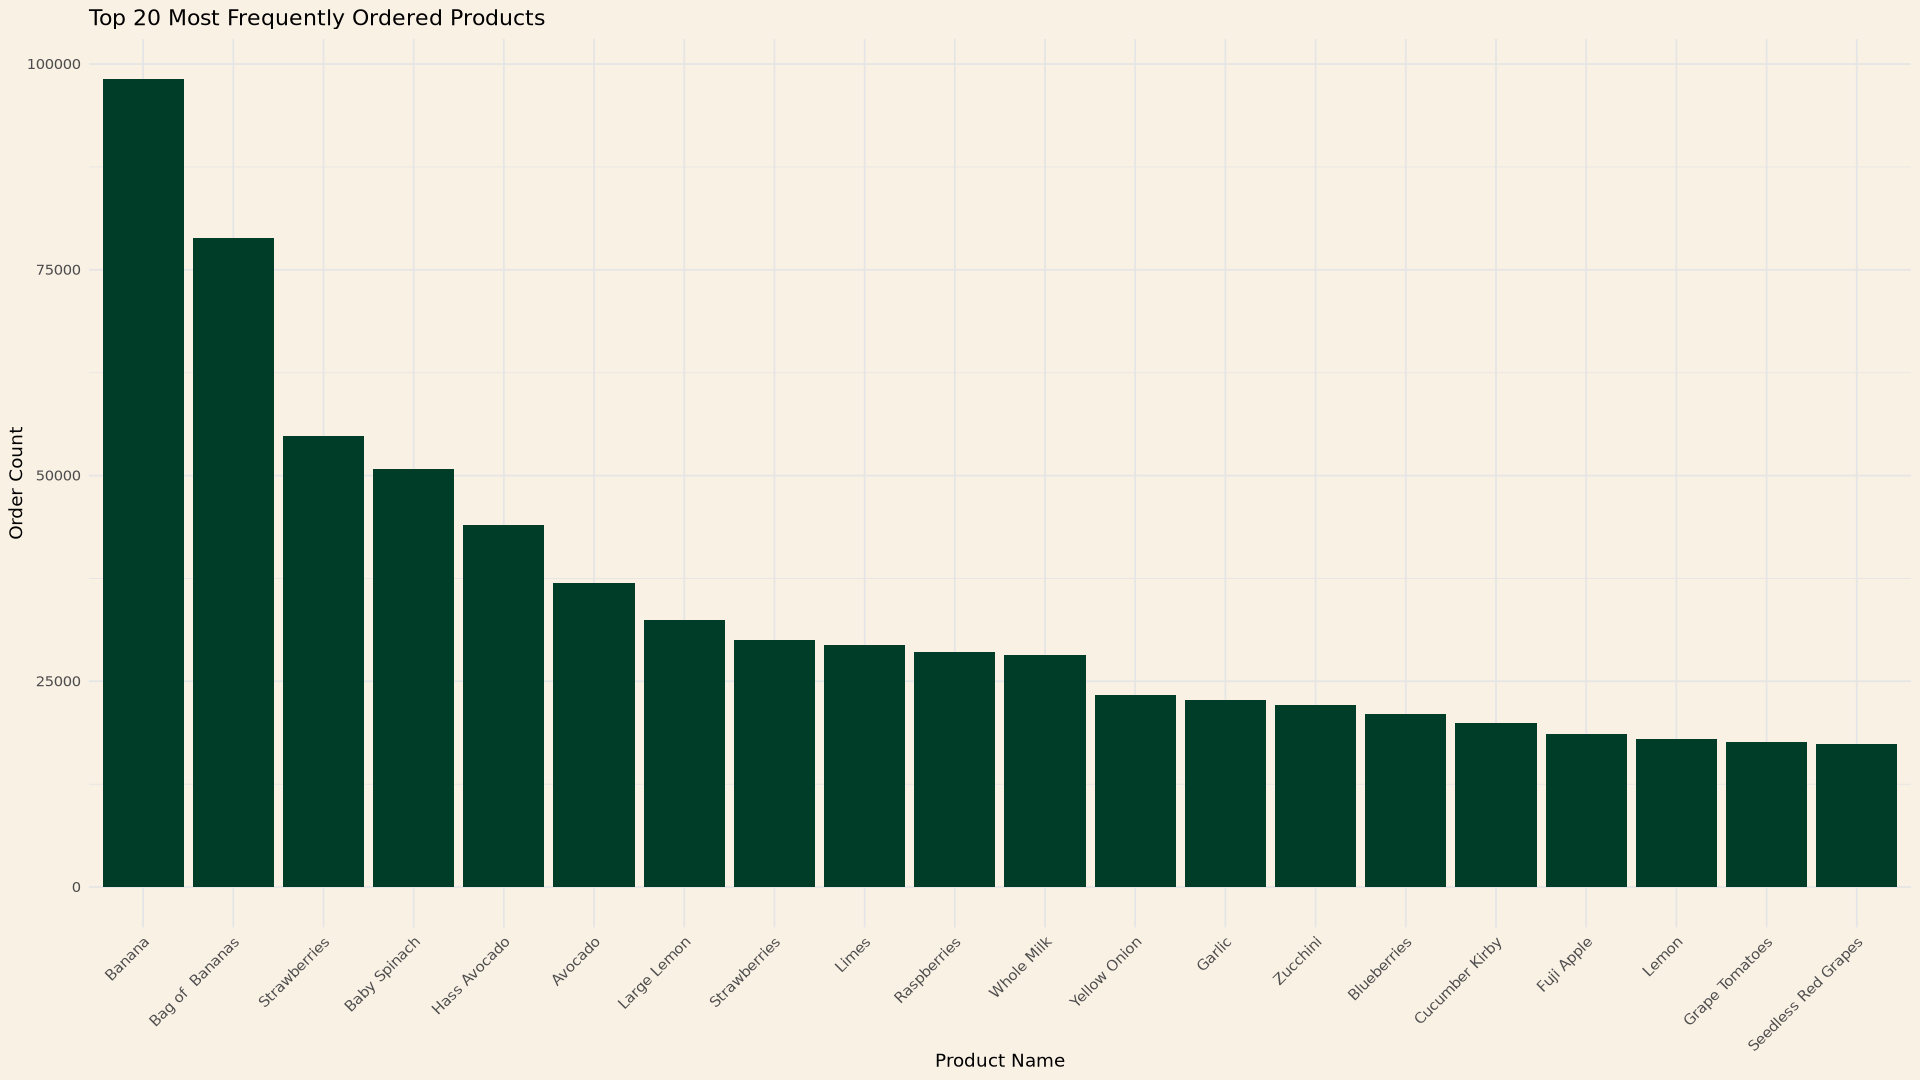

In [282]:
# Visualize the updated product names in a bar plot
ggplot(top_products_cleaned, aes(x = reorder(product_name, -order_count), y = order_count)) +
  geom_bar(stat = "identity", fill = "#003D29") +
  labs(
    title = "Top 20 Most Frequently Ordered Products",
    x = "Product Name",
    y = "Order Count"
  ) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) + 
  theme(
            plot.background = element_rect(fill = "#FAF1E5", color = NA),
            panel.background = element_rect(fill = "#FAF1E5", color = NA),
            panel.grid = element_line(color = "grey90")
  )

**Observations**
- Bananas are the most frequently ordered product, followed by Bag of Bananas and Strawberries, indicating their staple status in grocery shopping.
- Fresh produce dominates the top 20, including fruits (bananas, strawberries, apples, grapes) and vegetables (spinach, avocado, onions, garlic, tomatoes).
- Dairy (Whole Milk) is the only non-produce item, highlighting its essential role in grocery purchases.
- The order distribution is right-skewed, with a steep drop after the top few items, suggesting that a few staple items drive the majority of orders.

**Insights**
- Ensuring sufficient stock for high-demand items, offering strategic discounts, and recommending complementary products could enhance sales and customer satisfaction.

### Departments for top 20 products

In [290]:
tmp <- shortened_df %>% group_by(department_id, aisle_id) %>% summarize(n=n())
tmp <- tmp %>% left_join(departments_df, by="department_id")
tmp <- tmp %>% left_join(aisles_df, by="aisle_id")

`summarise()` has grouped output by 'department_id'. You can override using the
`.groups` argument.


In [291]:
# Define the top 20 product names
top_20_products <- c(
    "Banana", "Bag of Bananas", "Strawberries", "Baby Spinach", "Hass Avocado",
    "Avocado", "Large Lemon", "Strawberries", "Limes", "Raspberries",
    "Whole Milk", "Yellow Onion", "Garlic", "Zucchini", "Blueberries",
    "Cucumber Kirby", "Fuji Apple", "Lemon", "Grape Tomatoes", "Seedless Red Grapes"
)

# Step 1: Summarize orders at product level and filter for top 20 products
tmp2 <- shortened_df %>%
    group_by(product_id) %>%
    summarize(count = n()) %>%
    left_join(products_df, by = "product_id") %>%
    filter(product_name %in% top_20_products) %>%  # Filter only top 20 products
    ungroup()

# Step 2: Aggregate at the department and aisle level
tmp2 <- tmp2 %>%
    group_by(department_id, aisle_id) %>%
    summarize(sumcount = sum(count)) %>%
    left_join(tmp, by = c("department_id", "aisle_id")) %>%
    mutate(onesize = 1)

`summarise()` has grouped output by 'department_id'. You can override using the
`.groups` argument.


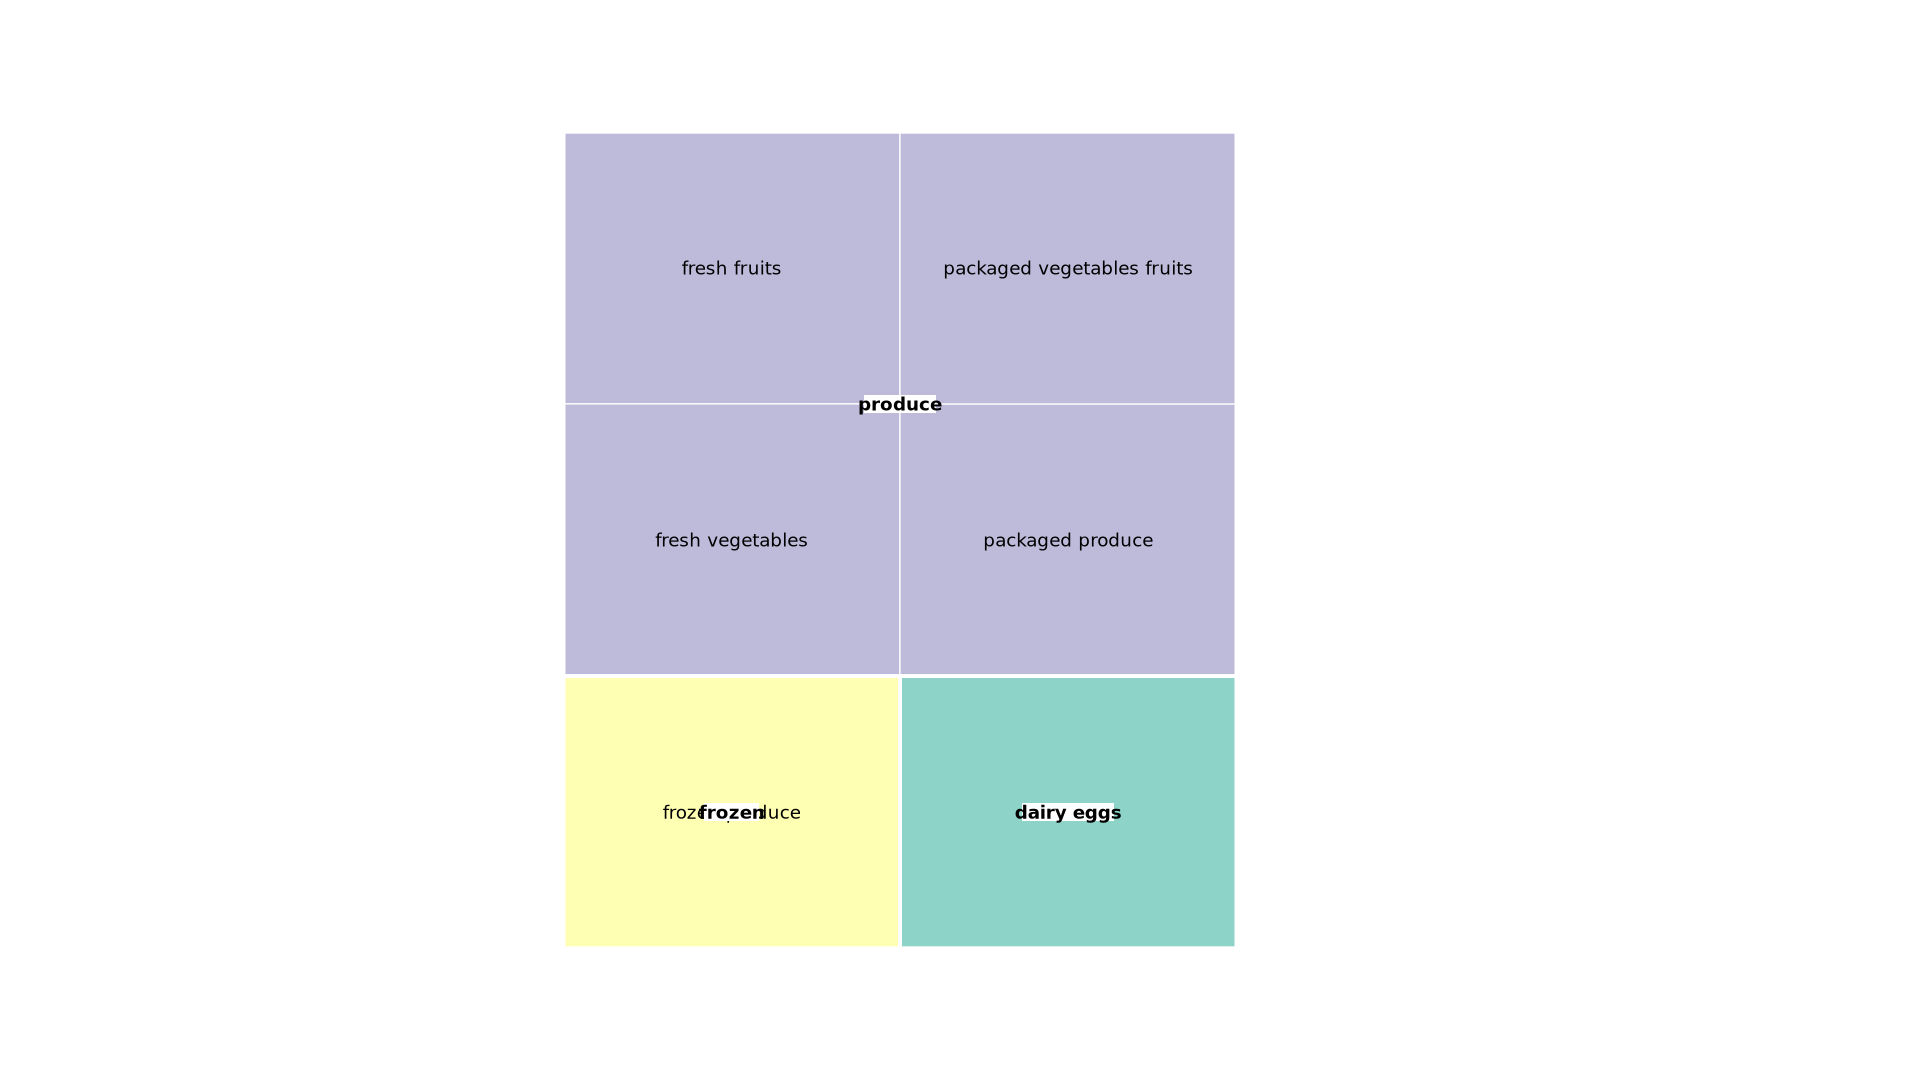

In [292]:
treemap(tmp2,index=c("department","aisle"),vSize="onesize",vColor="department",palette="Set3",title="",sortID="-sumcount", border.col="#FFFFFF",type="categorical", fontsize.legend = 0,bg.labels = "#FFFFFF")

**Observations**
- Produce dominates Instacart orders, with fresh fruits, vegetables, and packaged produce making up the majority.
- Dairy & Eggs and Frozen categories have smaller but significant shares, likely driven by Whole Milk and frozen produce.

**Insights**
- Efficient inventory management is crucial due to the high demand for perishable fresh items.
- Opportunities for bundling and recommendations, such as pairing fresh produce with dairy or frozen items, can drive sales.

### Size of top departments as per the product sales

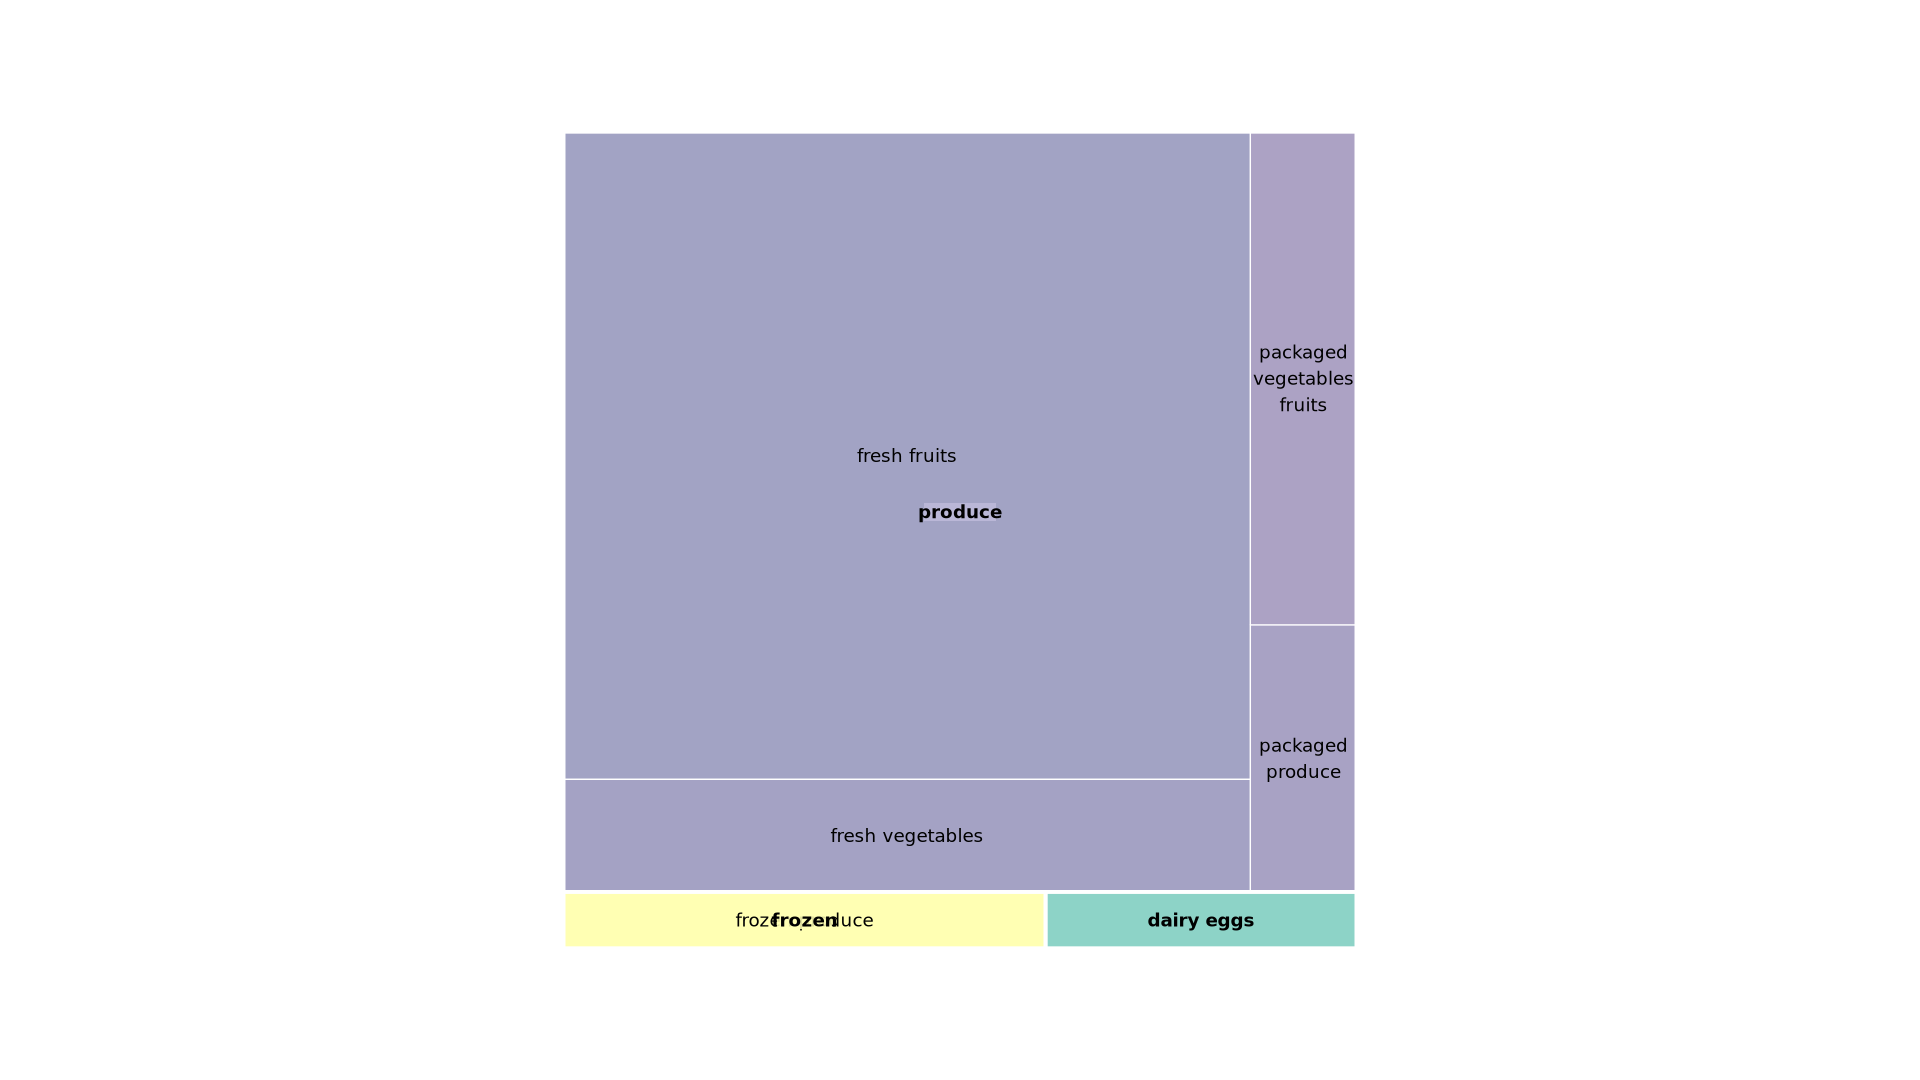

In [293]:
treemap(tmp2,index=c("department","aisle"),vSize="sumcount",title="",palette="Set3",border.col="#FFFFFF")

**Observations** 
- Fresh produce (fruits & vegetables) dominates purchases, indicating a strong customer preference for perishable and healthy food options.
- Packaged produce has a smaller share, suggesting that while some consumers prefer convenience, fresh options are still prioritized.
- Dairy & eggs and frozen produce are the least purchased categories, indicating lower demand compared to fresh produce.


**Insights**
- Frequent restocking is crucial due to perishability; efficient inventory management minimizes waste and ensures availability.
- Promote packaged and frozen categories by bundling them with fresh produce or offering discounts to encourage trial purchases.
- Increase demand for dairy & eggs and frozen items through personalized recommendations, discounts, or complementary product suggestions.

### Most Frequently Reordered Products

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


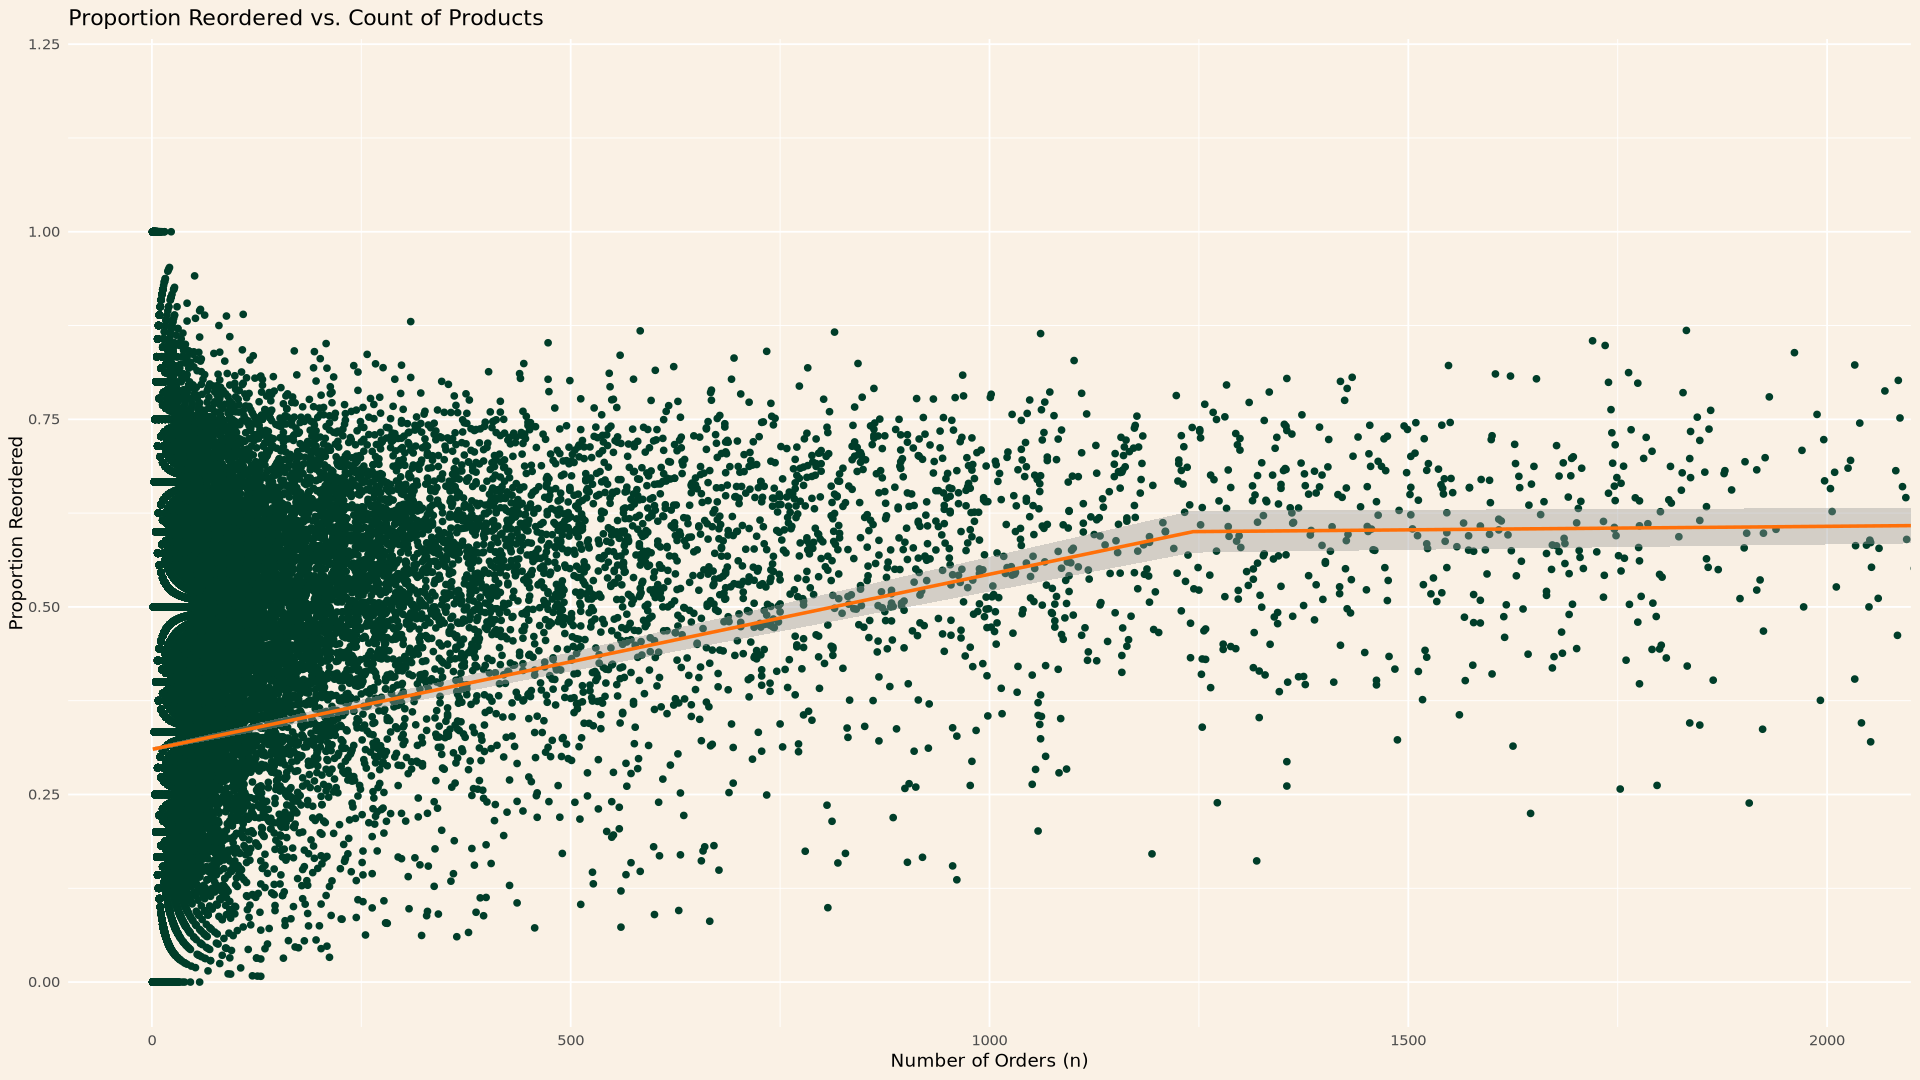

In [37]:
# Example: Generating the plot with customized colors
shortened_df %>%
  group_by(product_id) %>%
  summarize(proportion_reordered = mean(reordered), n = n()) %>%
  ggplot(aes(x = n, y = proportion_reordered)) +
  geom_point(color = "#003d29") +  # Dot color
  geom_smooth(color = "#ff7009") +  # Regression line color
  coord_cartesian(xlim = c(0, 2000)) +
  theme_minimal() +  # Base theme
  theme(
    plot.background = element_rect(fill = "#faf1e5", color = NA),  # Background color
    panel.background = element_rect(fill = "#faf1e5", color = NA), # Panel background color
    panel.grid.major = element_line(color = "white"),  # Gridline color
    panel.grid.minor = element_line(color = "white")   # Minor gridline color
  ) +
  labs(
    title = "Proportion Reordered vs. Count of Products",
    x = "Number of Orders (n)",
    y = "Proportion Reordered"
  )

**Observations**
- Products with a higher number of orders (n) tend to have more stable and higher reorder proportions, indicating they are likely staples or frequently purchased items.
- For products with low order counts (n), there is significant variability in reorder proportions, suggesting that reorder behavior for these products is less predictable and possibly influenced by niche preferences.
- At higher order counts (n > 500), reorder proportions stabilize around 0.5–0.75, indicating more consistent reorder patterns for popular products.

**Insights**
- This observation can help data scientists devise a more optimized recommendation algorithm by leveraging the observed trends and insights. Here’s a breakdown of how these insights contribute to optimizing a recommendation algorithm.

### Top 20 reordered products

In [98]:
library(wordcloud)

In [102]:
# Merge 2 datasets
merged_df <- shortened_df %>%
    inner_join(products_df, by = "product_id")

# Count reorders for each product 
reorder_counts <- merged_df %>%
  filter(reordered == 1) %>%  # Only consider reordered products
  group_by(product_name) %>%
  summarize(reorder_count = n()) %>%
  arrange(desc(reorder_count))

# Top 20 most reordered AND least reordered products
top_reordered <- reorder_counts %>% head(20)
least_reordered <- reorder_counts %>% arrange(reorder_count) %>% head(20)

In [103]:
top_reordered

product_name,reorder_count
<chr>,<int>
Banana,82886
Bag of Organic Bananas,65755
Organic Strawberries,42533
Organic Baby Spinach,39368
Organic Hass Avocado,35142
Organic Avocado,28104
Organic Whole Milk,23516
Large Lemon,22483
Organic Raspberries,22071


In [104]:
least_reordered

product_name,reorder_count
<chr>,<int>
#2 Cone White Coffee Filters,1
1 Step-1 Minute Noodles Toasted Sesame,1
1% Lowfat Cultured Buttermilk,1
"1,000 Mg Vitamin C Orange Effervescent Powdered Drink Mix",1
"1,000 mg Vitamin C Effervescent Powder Drink Cranberry Each Pak single",1
10 Tostada Shells,1
100 Calorie Bartlett in Extra Light Syrup Pear Halves,1
100 Calorie Variety Pack Ice Cream Bar,1
100 Count Assorted Minitures Bag,1


In [106]:
# Set up color palette
pal <- brewer.pal(8, "Dark2")

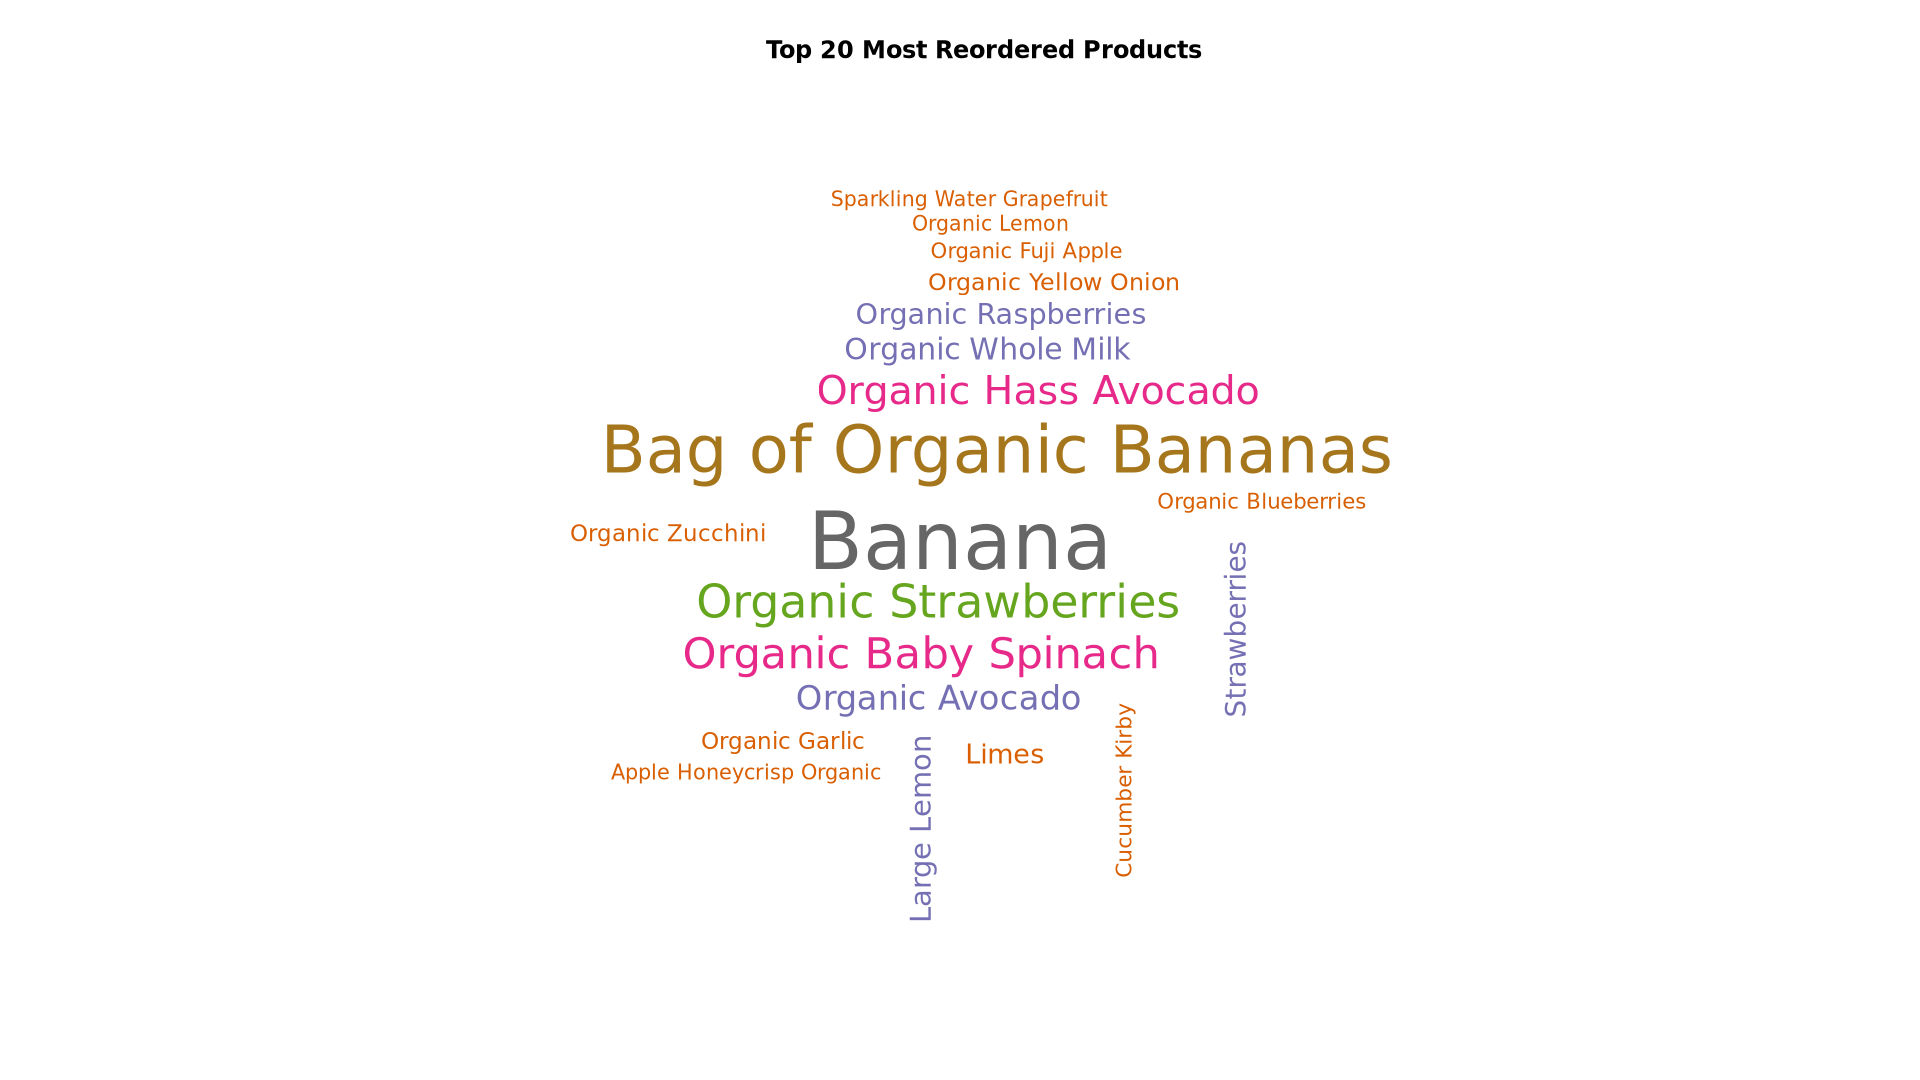

In [108]:
# Setup the color palette
wordcloud(words = top_reordered$product_name, 
          freq = top_reordered$reorder_count, 
          min.freq = 1, max.words = 20,
          colors = pal, random.order = FALSE)

# Title for visualization
title("Top 20 Most Reordered Products")

**Observations**
- From the above wordcloud, its prominent that people mostly buy organic fruits, vegetables and associated grocery items 

**Insights**
- Store market owners can prioritize restocking more organic fruits, vegetables and associated items

## Temporal Patterns in User Behaviour

- Temporal patterns help improve the accuracy of next-basket predictions by identifying when customers are likely to reorder products.
- Understanding weekly, monthly, and irregular shopping habits enables customer segmentation and supports targeted marketing campaigns.
- Identifying high-demand periods (e.g., specific days or hours) assists in inventory planning and ensures optimal stock levels.
- Seasonal purchasing trends allow businesses to adapt inventory and marketing strategies to seasonal demands effectively.
- Detecting irregular purchase intervals can flag potential customer churn, prompting timely re-engagement efforts.
- Analyzing order timings (e.g., order_hour_of_day) allows optimization of delivery schedules and promotion timing for a better customer experience.

### Order frequency by weekday

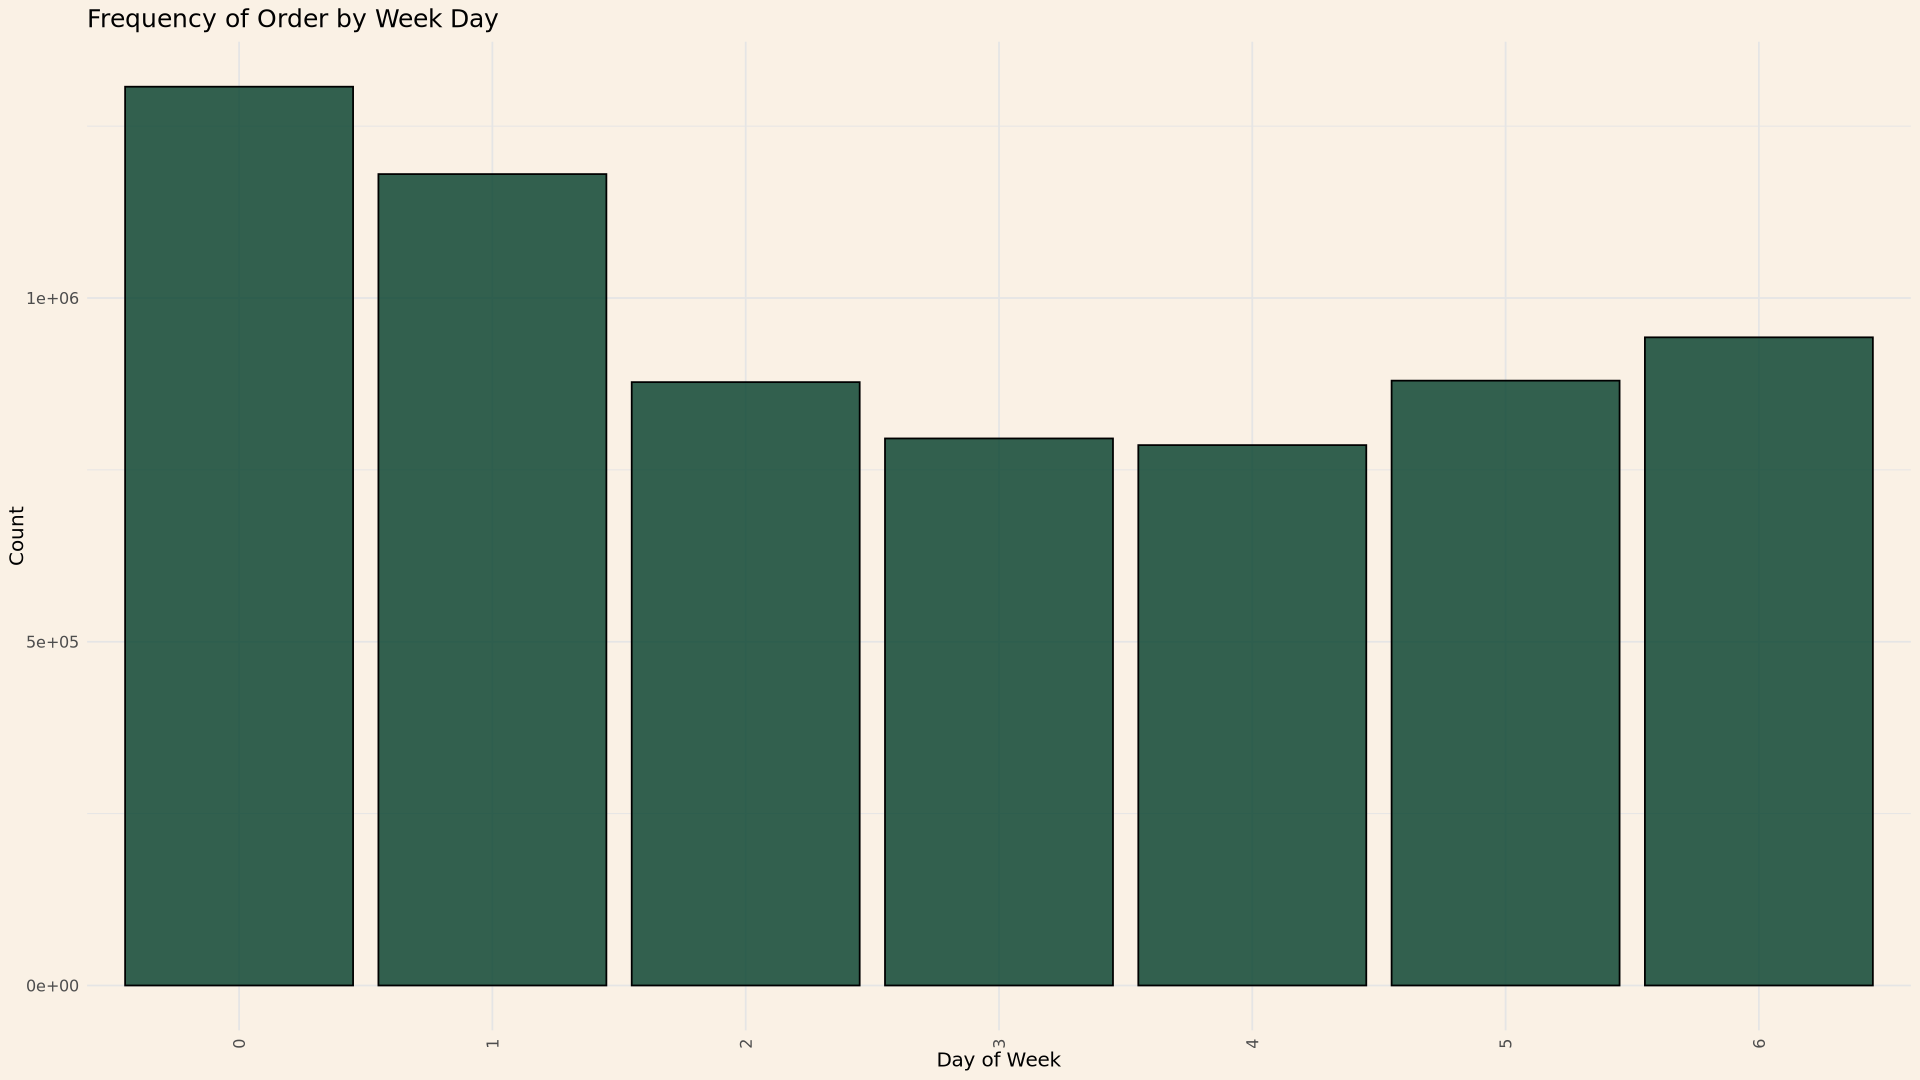

In [27]:
ggplot(shortened_df, aes(x = as.factor(order_dow))) +   # aes stands for aesthetics (mapping `order_dow` to x-axis)
  geom_bar(                                                   # Create a bar plot to calculate the frequency of each `order_dow`
    fill = "#003D29",                                          # Set the fill color of bars to a dark green
    color = "black",                                            # Add a black border to each bar for contrast
    alpha = 0.8                                                 # Set the transparency of the bars (on a scale of 0-1)
  ) + 
  labs(                                                        # Label the axes and title
    x = "Day of Week",                                          # Label for the x-axis
    y = "Count",                                                # Label for the y-axis
    title = "Frequency of Order by Week Day"                    # Title of the plot
  ) + 
  theme_minimal() +                                            # Use a minimalistic theme for the plot
  theme(
    text = element_text(size = 12),                             # Set the general font size for all text elements in the plot
    plot.title = element_text(                                  # Customize the title's appearance 
      size = 15,
    ),
    axis.text.x = element_text(                                 # Customize the appearance of x-axis labels
      angle = 90,                                               # Rotate the x-axis labels vertically (90 degrees)
      vjust = 0.5,                                              # Adjust vertical justification of the labels
      hjust = 1                                                 # Adjust horizontal justification of the labels
    ),
    plot.background = element_rect(fill = "#FAF1E5", color = NA),  # Set the plot background color
    panel.background = element_rect(fill = "#FAF1E5", color = NA), # Set the panel background color
    panel.grid = element_line(color = "grey90")                 # Set the color of the grid lines
  )

**Observations**
- Day 0 is Saturday and Day 1 is Sunday in the week, and most orders are there on weekends, since its an offtime for both office goers as well as school going kids. Hence, overall people have more time at their disposal. 

**Insights**
- Weekend shoppers might tend to place larger orders, often for stocking up or preparing for the week ahead.
- Categories like snacks, alcohol, prepared foods, and party supplies might show higher demand on weekends.
- Bulk purchases might be more common on weekends, likely for gatherings or special events.
- Product choices on weekends may differ from weekdays, with a focus on comfort foods or items for social gatherings.

### Order Frequency by hour of day

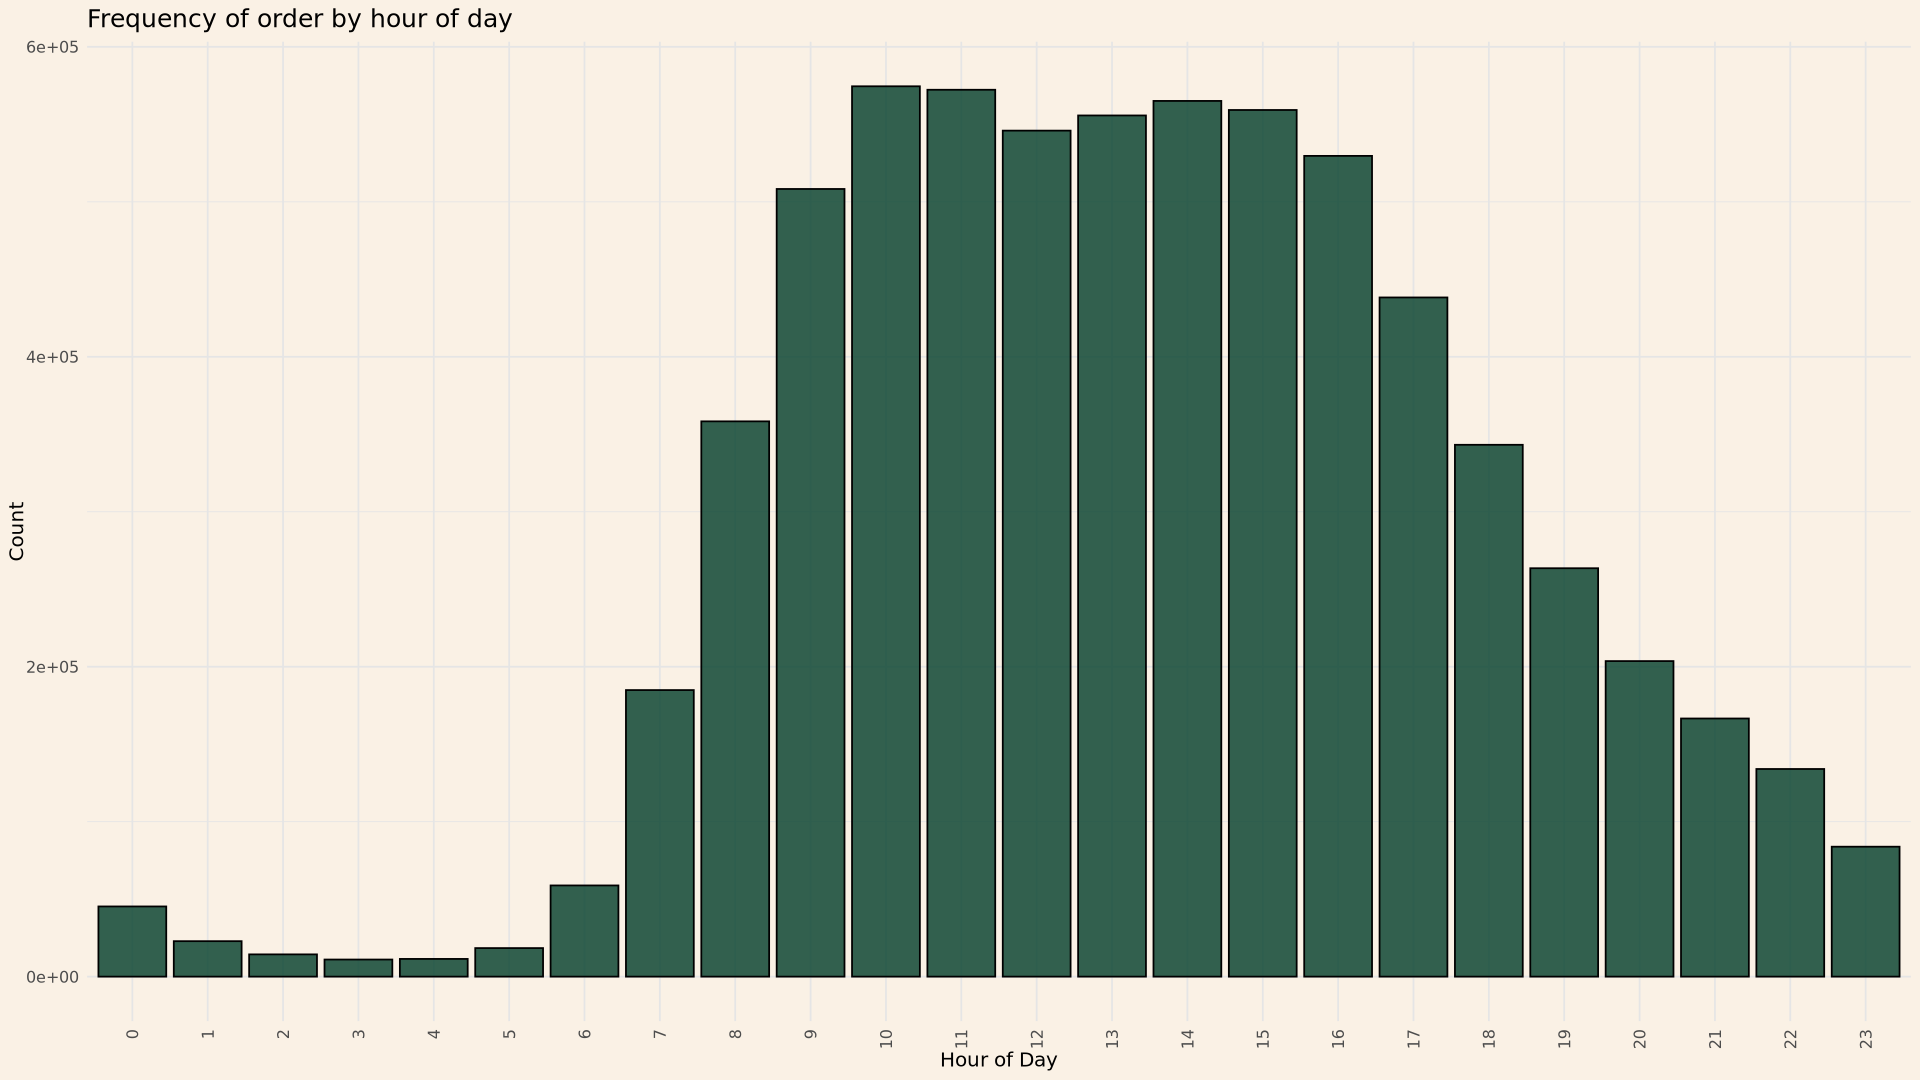

In [28]:
# Create the plot
ggplot(shortened_df, aes(x=as.factor(order_hour_of_day))) +   # aes stands for aesthetics (God knows why its like that) AND map `order_hour_of_day` as x-axis (converted to a factor for categorical plotting)
       geom_bar(                                   # create a bar plot to calculate the frequency of each `order_dow`
           fill="#003D29",                         # set the fill color of bars to steelblue
           color="black",                          # set the borderline of those bars to black
           alpha=0.8,                              # Set the transparency of the bars (on a scale of 0-1)
       ) + 
       labs(                                       # x is just the shorthand for labels and axes
           x="Hour of Day",                        # Label for the x-axis
           y="Count",                              # Label for the y-axis
           title="Frequency of order by hour of day", # title of the plot
       ) + 
       theme_minimal() +                           # Use a minimalistic theme for the plot
       theme(
        text=element_text(size=12),                # Set the general font size for all text elements in the plot
        plot.title=element_text(                   # Customize the title's appearance 
               size=15,                        
           ),
       axis.text.x = element_text(                 # Customize the appearance of x-axis labels
           angle=90,                               # rotate the x-axis labels vertically (90 degrees)
           vjust=0.5,                              # adjust vertical justification of the labels 
           hjust=1                                 # adjust horizontal justification of the labels 
       ), 
        plot.background = element_rect(fill = "#FAF1E5", color = NA),  # Set the plot background color
        panel.background = element_rect(fill = "#FAF1E5", color = NA), # Set the panel background color
        panel.grid = element_line(color = "grey90")                 # Set the color of the grid lines
)

**Observation(s)**
- As can be spotted in the plot above, the order frequency starts appreciating from 6 AM onwards and peaks around 10-11 AM, and stays close to that range until around 3PM, and then starts falling again
- Hence we can conclude that a majority of the orders are made around daytime. Now let's combine the day of week with the hour of day to see the distribution

**Analysis**
- It is understandable that people tend to place orders in the morning, as they may be planning their meals or errands for the day ahead. The ordering trend typically continues until noon, particularly for those seeking same-day delivery, as they may want to ensure timely arrival of their groceries or essentials for the rest of the day.

### Order Frequency by order of day and order hour of day

In [64]:
library(formattable)

In [32]:
# Assuming the original dataframe is called 'df'
grouped_df <- shortened_df %>%
  group_by(order_dow, order_hour_of_day) %>%  # Group by day of the week and hour of the day
  summarise(count_order_nos = n()) %>%        # Count the number of orders for each group
  ungroup()                                   # Remove the grouping structure

`summarise()` has grouped output by 'order_dow'. You can override using the
`.groups` argument.


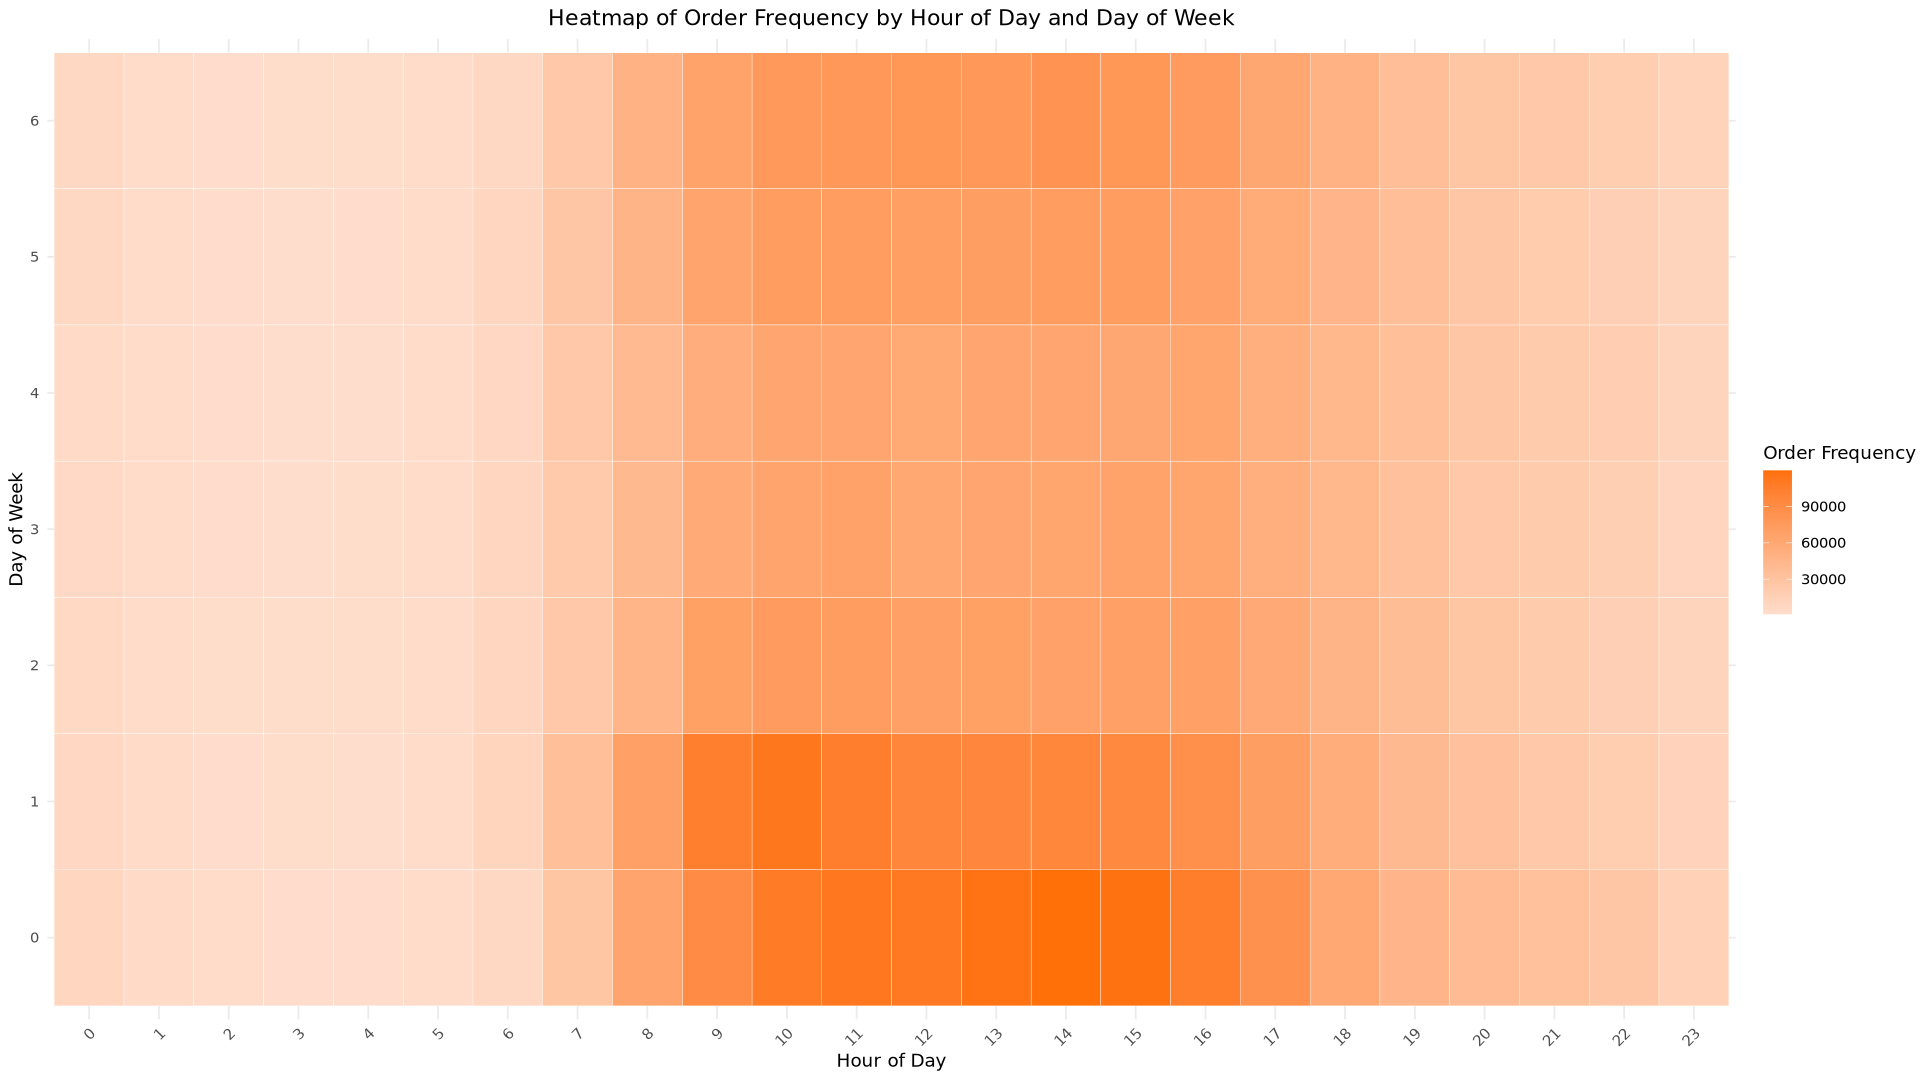

In [34]:
# Sorting the grouped_df by count_order_nos in descending order
grouped_df_sorted <- grouped_df %>%
  arrange(desc(count_order_nos))

# Plotting the heatmap
ggplot(grouped_df_sorted, aes(x = factor(order_hour_of_day), y = factor(order_dow))) +
  geom_tile(aes(fill = count_order_nos), color = "white") +
  scale_fill_gradient(low = "#FFDDCC", high = "#FF7009", name = "Order Frequency") +  # Set gradient color scale
  labs(
    title = "Heatmap of Order Frequency by Hour of Day and Day of Week",
    x = "Hour of Day",
    y = "Day of Week"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    plot.title = element_text(hjust = 0.5)
  )

**Observations**
- **Peak Ordering Hours**: Highest order frequency occurs between 9 AM and 4 PM, with a noticeable concentration around midday (12 PM - 3 PM).
- **Lower Order Frequency at Night**: Very few orders are placed between 12 AM and 6 AM, showing low demand during late-night hours.
- **Consistent Demand Across Days**: Order frequency appears fairly stable throughout the week, without drastic variations between days.

**Insights**
- Increase workforce and delivery fleet availability during peak hours to ensure fast fulfillment.
- Introduce discounts or incentives for late-night or early-morning orders to spread demand more evenly.
- Ensure inventory replenishment aligns with peak hours to avoid stockouts and improve order fulfillment efficiency.

In [1]:
## Test Check

In [2]:
# Select all columns containing "organic" in their name
# Filter rows where product_name contains the word "organic"
# organic_rows <- products_df %>%
#   filter(str_detect(tolower(product_name), "organic"))

# # View the resulting rows
# print(organic_rows)

In [6]:
# Percentage of re-orders in prior set 
# percentage_reorders <- sum(order_products_prior_df$reordered) / nrow(order_products_prior_df)

# Multiply by 100 if want an actual percentage instead of a fraction
# percentage_reorders <- round(percentage_reorders * 100, 2)
# print(paste0("Percentage of reorders: ", percentage_reorders, "%"))

In [7]:
# Percentage of re-orders in train set 
# train_perc_reorders <- sum(order_products_train_df$reordered) / nrow(order_products_train_df)

# Multiply by 100 if want an actual percentage instead of a fraction
# train_perc_reorders <- round(train_perc_reorders * 100, 2)
# print(paste0("Percentage of reorders: ", train_perc_reorders, "%"))

<!-- As can be assessed from the example the dataset is balanced. Close to 60% of the orders were reordered -->

<!-- **No re-ordered products**:
- Now that ~60% of the products are re-ordered, there will also be products when none of the products are reordered. Let's check that now -->

In [3]:
# Convert values of 'reordered' to 1 if they are greater than 1
# grouped_df$reordered_sum[grouped_df$reordered_sum > 1] <- 1

# Calculate the proportion of each 'reordered' value
# table(grouped_df$reordered_sum) / nrow(grouped_df)

In [4]:
# grouped_df <- shortened_df %>%
#         group_by(order_id) %>%
#         summarize(cart_size=max(add_to_cart_order)) %>%
#         ungroup()

In [5]:
# Calculate counts in each dataframe
# counts_df <- grouped_df %>%
#   count(cart_size)
# head(counts_df)

In [8]:
# sum(is.na(counts_df))

## Analyze Cart-Size Distribution

Warning message:
“Removed 41 rows containing missing values or values outside the scale range
(`geom_bar()`).”


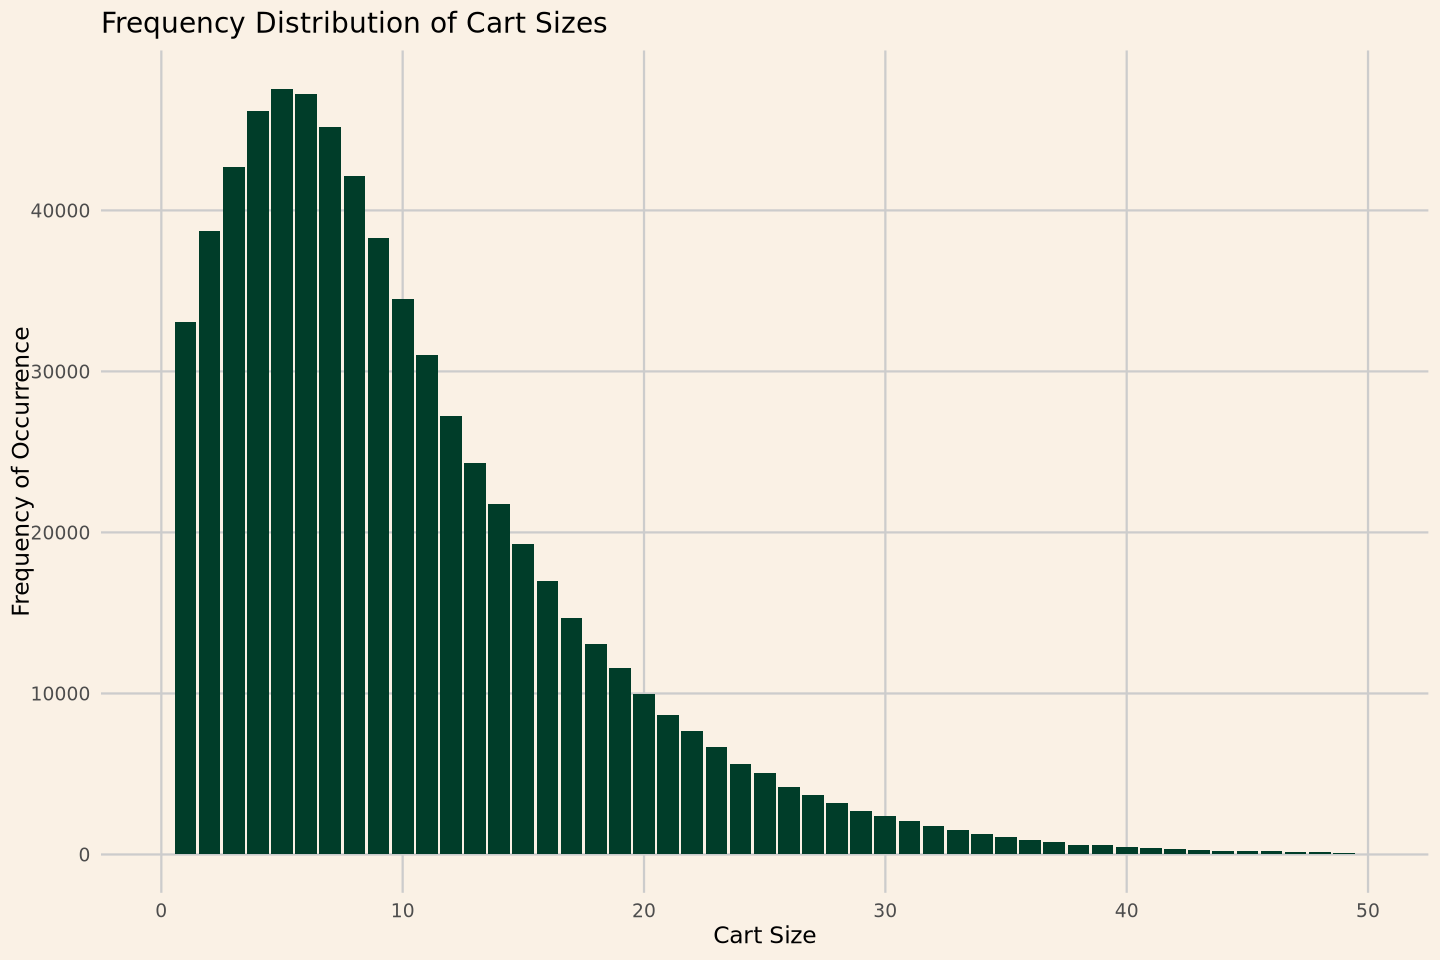

In [128]:
# Define required colors
bar_color <- "#003D29"  # Dark Green for bars
background_color <- "#FAF1E5"  # Cashew for background

# Create the plot without explicit color codes
ggplot(counts_df, aes(x = cart_size, y = n)) +
  geom_bar(stat = "identity", fill = bar_color) +  # Apply dark green to bars
  xlim(0, 50) +  # Set x-axis limit between 0 and 50
  theme_minimal(base_size = 14) +
  theme(
    panel.background = element_rect(fill = background_color, color = NA),
    plot.background = element_rect(fill = background_color, color = NA),
    legend.background = element_rect(fill = background_color, color = NA),
    panel.grid.major = element_line(color = "gray80"),
    panel.grid.minor = element_blank()
  ) +
  labs(
    title = "Frequency Distribution of Cart Sizes",
    x = "Cart Size",
    y = "Frequency of Occurrence"
  )

**Observations**
- The majority of customer orders contain 8-12 items, indicating that most users place medium-sized orders rather than small or bulk purchases.
- The histogram follows a right-skewed pattern, meaning smaller carts are significantly more frequent, while larger carts (above 30 items) occur much less often.
- The frequency of orders steadily decreases as cart sizes go beyond 5-6 items, confirming that only a few customers buy in bulk.

**Insights**
- Smaller carts dominate the distribution, suggesting a preference for frequent, quick purchases.
- Retailers can optimize stock and marketing by targeting medium-order customers with personalized recommendations and bundled deals.